In [1]:
import gymnasium as gym
import config
import random 
import farm_env # Import necessary to register the gym environment

In [2]:
env = gym.make(id='FarmEnv-v0',
                initial_budget = config.INITIAL_BUDGET,
                sheep_cost = config.SHEEP_COST,
                wheat_cost = config.WHEAT_COST,
                wool_price = config.WOOL_PRICE,
                wheat_price = config.WHEAT_PRICE,
                max_years = config.MAX_YEARS,
                wool_fixed_cost = config.WOOL_FIXED_COST,
                storm_probability = config.STORM_PROBABILITY,
                incest_penalty = config.INCEST_PENALTY,
                )

In [3]:
observation, info = env.reset()
print(observation, info)

{'budget': 2000, 'sheep_count': 0, 'bought_sheep_count': 0, 'year': 0} {}


In [13]:
X = torch.tensor([2000, 10, 2, 5], dtype=float)
w = torch.tensor([0.6, 0.15, 0.15, 0.1], dtype=float)
X @ w

tensor(1202.3000, dtype=torch.float64)

In [66]:
env.step(1)

({'budget': array([2890.], dtype=float32),
  'sheep_count': 18,
  'bought_sheep_count': 2,
  'year': 30},
 2890,
 True,
 False,
 {})

In [83]:
observation, info = env.reset()
for _ in range(30):
    options = env.unwrapped.actions_available
    random_action = random.choice(options)
    
    observation, reward, terminated, truncated, info = env.step(random_action)
    print(random_action, observation, reward, terminated, truncated, info)
    if terminated or truncated:
        print("============End of episode============")
        observation, info = env.reset()
        break
env.close()

1 {'budget': array([2030.], dtype=float32), 'sheep_count': 0, 'bought_sheep_count': 0, 'year': 1} 2030 False False {}
2 {'budget': array([2030.], dtype=float32), 'sheep_count': 0, 'bought_sheep_count': 0, 'year': 2} 2030 False False {}
1 {'budget': array([2010.], dtype=float32), 'sheep_count': 0, 'bought_sheep_count': 0, 'year': 3} 2010 False False {}
0 {'budget': array([1011.], dtype=float32), 'sheep_count': 1, 'bought_sheep_count': 1, 'year': 4} 1011 False False {}
2 {'budget': array([1012.], dtype=float32), 'sheep_count': 1, 'bought_sheep_count': 1, 'year': 5} 1012 False False {}
2 {'budget': array([1013.], dtype=float32), 'sheep_count': 1, 'bought_sheep_count': 1, 'year': 6} 1013 False False {}
0 {'budget': array([24.], dtype=float32), 'sheep_count': 3, 'bought_sheep_count': 2, 'year': 7} 24 False False {}
1 {'budget': array([75.], dtype=float32), 'sheep_count': 3, 'bought_sheep_count': 2, 'year': 8} 75 False False {}
2 {'budget': array([96.], dtype=float32), 'sheep_count': 4, 'bou

----------------

In [1]:
import gymnasium as gym
import config
import random
from algorithms import FarmAgentSarsaVFA
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import farm_env # Import necessary to register the gym environment

In [2]:
def conv(a, win=100):
    return np.convolve(a, np.ones(win), mode='same') / win

In [3]:
env = gym.make(id='FarmEnv-v0',
                initial_budget = config.INITIAL_BUDGET,
                sheep_cost = config.SHEEP_COST,
                wheat_cost = config.WHEAT_COST,
                wool_price = config.WOOL_PRICE,
                wheat_price = config.WHEAT_PRICE,
                max_years = config.MAX_YEARS,
                wool_fixed_cost = config.WOOL_FIXED_COST,
                storm_probability = config.STORM_PROBABILITY,
                incest_penalty = config.INCEST_PENALTY,
                )

In [4]:
learning_rate = 0.001
n_episodes = 10_000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

vfa_agent = FarmAgentSarsaVFA(
    environment=env, learning_rate=learning_rate, epsilon=start_epsilon, epsilon_decay=epsilon_decay, final_epsilon=final_epsilon, gamma=.95
)

In [5]:
nenv = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
for episode in tqdm(range(n_episodes)):
    state, info = nenv.reset()
    done = False
    while not done:
        action = vfa_agent.policy(state)
        # print(action)
        s_prime, reward, terminated, truncated, info = nenv.step(action=action)
        # update
        vfa_agent.update(state, action, reward, s_prime)
        done = terminated or truncated
        state = s_prime
    vfa_agent.decay_epsilon()

  0%|          | 0/10000 [00:00<?, ?it/s]c:\Users\leoac\AppData\Local\pypoetry\Cache\virtualenvs\manage-a-farm-mRYmmniZ-py3.11\Lib\site-packages\gymnasium\utils\passive_env_checker.py:131: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'int'>
  logger.warn(
c:\Users\leoac\AppData\Local\pypoetry\Cache\virtualenvs\manage-a-farm-mRYmmniZ-py3.11\Lib\site-packages\gymnasium\spaces\box.py:240: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")
c:\Users\leoac\AppData\Local\pypoetry\Cache\virtualenvs\manage-a-farm-mRYmmniZ-py3.11\Lib\site-packages\gymnasium\utils\passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
c:\Users\leoac\AppData\Local\pypoetry\Cache\virtualenvs\manage-a-farm-mRYmmniZ-py3.11\Lib\site-packages\gymnasium\utils\passive_env_check

1
tensor(3.0300, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1., 1., 1., 1.], dtype=torch.float64, grad_fn=<SliceBackward0>)
tensor(2., dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1., 1., 1., 1.], dtype=torch.float64, grad_fn=<SliceBackward0>)
0
tensor(5.0310, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0310, 1.0000, 1.0000, 2.0000], dtype=torch.float64) tensor([1., 1., 1., 1.], dtype=torch.float64, grad_fn=<SliceBackward0>)
tensor(3.0300, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1., 1., 1., 1.], dtype=torch.float64, grad_fn=<SliceBackward0>)
2
tensor(6.0339, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0320, 1.0000, 1.0000, 3.0000], dtype=torch.float64) tensor([1.0018, 1.0000, 1.0000, 1.0000], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(5.0310, dtype=

  0%|          | 2/10000 [00:00<25:51,  6.45it/s]

1
tensor(2.9535, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([0.9979, 0.9775, 1.0035, 0.9776], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(2.0004, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.0002, 1.0403, 1.0153, 1.0576], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(5.1536, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.9810, 1.0000, 1.0000, 2.0000], dtype=torch.float64) tensor([1.0018, 1.0403, 1.0153, 1.0576], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(2.9962, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.0022, 1.0042, 1.0032, 1.0118], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(6.2122, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.9820, 1.0000, 1.0000, 3.0000], dtype=torch.float64) tensor([1.0018, 1.04

  0%|          | 4/10000 [00:00<23:46,  7.01it/s]

tensor(22.7692, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4210,  6.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([0.9985, 0.9783, 1.0187, 1.0315], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(24.8925, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5230,  6.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([0.9985, 0.9774, 1.0184, 1.0293], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(23.8122, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4720,  6.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([0.9985, 0.9774, 1.0184, 1.0293], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(25.9692, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6040,  6.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([0.9984, 0.9767, 1.0182, 1.0276], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(24.8159, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5230,  6.0000,  2.0000, 16.0000], dt

  0%|          | 5/10000 [00:00<23:11,  7.18it/s]

0
tensor(4.0771, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([1.0087, 1.0076, 1.0205, 1.0393], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(2.0317, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.0158, 1.0069, 1.0146, 1.1146], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(5.1476, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0320, 1.0000, 1.0000, 2.0000], dtype=torch.float64) tensor([1.0087, 1.0076, 1.0205, 1.0393], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(4.0771, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([1.0087, 1.0076, 1.0205, 1.0393], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(8.4137, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0430, 3.0000, 2.0000, 3.0000], dtype=torch.float64) tensor([0.9970, 1.01

  0%|          | 7/10000 [00:00<21:59,  7.57it/s]

tensor([1.0133, 1.0259, 1.0318, 1.0978], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(21.1494, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0160,  1.0000,  1.0000, 16.0000], dtype=torch.float64) tensor([1.0217, 1.0141, 1.0174, 1.1300], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(27.0017, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0480,  5.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.0133, 1.0259, 1.0318, 1.0978], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(24.4314, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0270,  3.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.0016, 1.0327, 1.0472, 1.1301], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(28.1715, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1190,  5.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.0133, 1.0259, 1.0318, 1.0978], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(27.001

  0%|          | 8/10000 [00:01<22:06,  7.53it/s]

2
tensor(3.1596, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([1.0036, 1.0542, 1.0593, 1.1524], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(2.0072, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.0036, 1.0542, 1.0593, 1.1524], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(5.5570, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 2.0000], dtype=torch.float64) tensor([1.0160, 1.0882, 1.0461, 1.2028], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(3.2435, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([1.0286, 1.0431, 1.0245, 1.1863], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(6.7608, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0020, 1.0000, 1.0000, 3.0000], dtype=torch.float64) tensor([1.0160, 1.0882, 1.0461, 1.2028], dtype=torch

  0%|          | 10/10000 [00:01<21:59,  7.57it/s]

tensor(35.5180, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0570, 10.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.0363, 1.0530, 1.0286, 1.2131], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(39.1143, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2690, 12.0000,  3.0000, 20.0000], dtype=torch.float64) tensor([1.0076, 1.0527, 1.0682, 1.1503], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(37.8522, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1580, 12.0000,  3.0000, 19.0000], dtype=torch.float64) tensor([1.0076, 1.0527, 1.0682, 1.1503], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(40.9789, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3800, 12.0000,  3.0000, 21.0000], dtype=torch.float64) tensor([1.0154, 1.0810, 1.0559, 1.1644], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(38.8038, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2690, 12.0000,  3.0000, 20.0000], dt

  0%|          | 11/10000 [00:01<23:55,  6.96it/s]

tensor(11.7062, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0750, 3.0000, 2.0000, 5.0000], dtype=torch.float64) tensor([1.0116, 1.1070, 1.0840, 1.2283], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(16.4774, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1170, 5.0000, 2.0000, 7.0000], dtype=torch.float64) tensor([1.0117, 1.1102, 1.0861, 1.2337], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(13.4347, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0960, 5.0000, 2.0000, 6.0000], dtype=torch.float64) tensor([1.0173, 0.9809, 1.0490, 1.0558], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(17.7323, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1380, 5.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.0117, 1.1102, 1.0861, 1.2337], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(14.6709, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1170, 5.0000, 2.0000, 7.0000], dtype=torch.float64) t

  0%|          | 13/10000 [00:01<22:00,  7.56it/s]

tensor([ 0.9400, 12.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.0232, 1.0726, 1.0775, 1.2228], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(36.8459, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8490, 10.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.0134, 1.0856, 1.0896, 1.2079], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(41.8108, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0810, 12.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.0232, 1.0726, 1.0775, 1.2228], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(40.4437, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9400, 12.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.0232, 1.0726, 1.0775, 1.2228], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(43.8935, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1920, 12.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.0148, 1.1023, 1.0929, 1.2396], d

  0%|          | 14/10000 [00:01<25:44,  6.46it/s]

tensor([1.0222, 1.0687, 1.0834, 1.1999], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(22.5582, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3080, 8.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.0199, 1.1903, 1.1140, 1.3117], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(18.3038, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2170, 7.0000, 2.0000, 7.0000], dtype=torch.float64) tensor([1.0223, 1.0712, 1.0841, 1.2022], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(23.4348, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3790, 9.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.0230, 1.0938, 1.0906, 1.2247], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(22.5582, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3080, 8.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.0199, 1.1903, 1.1140, 1.3117], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(27.7110, dtype=torch

  0%|          | 15/10000 [00:02<25:32,  6.52it/s]

1
tensor(19.3893, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1480,  4.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([1.0194, 1.1185, 1.1081, 1.2548], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(15.9070, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1370, 4.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.0166, 0.9349, 1.0810, 1.0962], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(20.3325, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1790,  6.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([1.0169, 0.9450, 1.0860, 1.1189], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(19.3893, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1480,  4.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([1.0194, 1.1185, 1.1081, 1.2548], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(24.2133, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2300,  6.0000,  2.0000, 12.0000], dtyp

  0%|          | 16/10000 [00:02<26:44,  6.22it/s]

1
tensor(30.7351, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4730,  9.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.0274, 1.0399, 1.0892, 1.1007], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(28.4531, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3720,  8.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.0247, 0.9529, 1.0914, 1.1416], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(32.1635, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5340,  9.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.0250, 0.9597, 1.0931, 1.1552], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(30.9458, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4730,  9.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.0250, 0.9597, 1.0931, 1.1552], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(34.2238, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6150, 10.0000,  2.0000, 19.0000], 

  0%|          | 17/10000 [00:02<27:48,  5.98it/s]

1
tensor(41.1429, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4390,  8.0000,  2.0000, 23.0000], dtype=torch.float64) tensor([1.0365, 1.0237, 1.1049, 1.3169], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(39.7731, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3880,  8.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.0365, 1.0237, 1.1049, 1.3169], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(43.2036, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5400,  9.0000,  2.0000, 24.0000], dtype=torch.float64) tensor([1.0362, 1.0186, 1.1037, 1.3029], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(40.7775, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4390,  8.0000,  2.0000, 23.0000], dtype=torch.float64) tensor([1.0362, 1.0186, 1.1037, 1.3029], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(44.8295, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6210,  9.0000,  2.0000, 25.0000], 

  0%|          | 18/10000 [00:02<30:42,  5.42it/s]

tensor([ 1.3910, 10.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.0444, 1.1317, 1.1179, 1.2850], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(40.5680, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2700, 10.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.0370, 1.0408, 1.1110, 1.3311], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(44.1815, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.4820, 11.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.0363, 1.0352, 1.1099, 1.3199], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(41.9902, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3910, 10.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.0444, 1.1317, 1.1179, 1.2850], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(48.2011, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.5830, 13.0000,  2.0000, 23.0000], dtype=torch.float64) tensor([1.0445, 1.1324, 1.1180, 1.2865], d

  0%|          | 19/10000 [00:02<31:34,  5.27it/s]

tensor(46.3419, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0170, 10.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.0538, 1.2096, 1.1330, 1.4049], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(53.2385, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2590, 13.0000,  2.0000, 24.0000], dtype=torch.float64) tensor([1.0428, 1.1273, 1.1342, 1.4584], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(51.6226, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1080, 13.0000,  2.0000, 23.0000], dtype=torch.float64) tensor([1.0428, 1.1273, 1.1342, 1.4584], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(57.7775, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3800, 14.0000,  2.0000, 25.0000], dtype=torch.float64) tensor([1.0567, 1.2384, 1.1388, 1.4682], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(54.9431, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2590, 13.0000,  2.0000, 24.0000], dt

  0%|          | 20/10000 [00:03<30:49,  5.40it/s]

tensor(59.2928, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9640, 15.0000,  3.0000, 27.0000], dtype=torch.float64) tensor([1.0545, 1.1941, 1.1450, 1.3678], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(71.5461, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2660, 21.0000,  4.0000, 29.0000], dtype=torch.float64) tensor([1.0562, 1.2204, 1.1502, 1.4151], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(64.1084, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1050, 16.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([1.0746, 1.2455, 1.0686, 1.4210], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(71.8331, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4970, 23.0000,  4.0000, 30.0000], dtype=torch.float64) tensor([1.0387, 1.0935, 1.1307, 1.3881], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(68.0180, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2660, 21.0000,  4.0000, 29.0000], dt

  0%|          | 21/10000 [00:03<29:59,  5.54it/s]

1
tensor(3.6220, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.0441, 1.1665, 1.1521, 1.5025], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(2.0882, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.0441, 1.1665, 1.1521, 1.5025], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(6.1530, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0310, 1.0000, 1.0000, 2.0000], dtype=torch.float64) tensor([1.0515, 1.1836, 1.1517, 1.3668], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(3.6873, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.0814, 1.2866, 1.0778, 1.4921], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(7.9409, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0120, 1.0000, 1.0000, 3.0000], dtype=torch.float64) tensor([1.0837, 1.28

  0%|          | 22/10000 [00:03<36:05,  4.61it/s]

tensor(45.6302, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1390, 10.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.0480, 1.1775, 1.1592, 1.5171], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(43.0242, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0480, 10.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.0545, 1.2224, 1.1652, 1.4402], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(46.3378, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2600, 10.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.0549, 1.2266, 1.1660, 1.4481], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(45.6302, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1390, 10.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.0480, 1.1775, 1.1592, 1.5171], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(48.0537, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3310, 10.0000,  2.0000, 22.0000], dt

  0%|          | 23/10000 [00:03<35:43,  4.65it/s]

2
tensor(36.7532, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3780, 10.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.0619, 1.2200, 1.1693, 1.4542], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(33.9930, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2970,  9.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.0619, 1.2200, 1.1693, 1.4542], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(38.6233, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4690, 10.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.0622, 1.2291, 1.1713, 1.4682], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(37.0584, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3780, 10.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.0622, 1.2291, 1.1713, 1.4682], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(41.2886, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5600, 11.0000,  2.0000, 17.0000], 

  0%|          | 24/10000 [00:03<33:26,  4.97it/s]

tensor([ 0.6940,  8.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.0576, 1.1979, 1.1741, 1.5668], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(42.8645, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8960, 10.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.0655, 1.2478, 1.1786, 1.5042], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(39.3404, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7950,  8.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.0575, 1.1963, 1.1737, 1.5636], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(44.4656, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9870, 10.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.0655, 1.2478, 1.1786, 1.5042], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(42.8645, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8960, 10.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.0655, 1.2478, 1.1786, 1.5042], d

  0%|          | 26/10000 [00:04<27:19,  6.08it/s]

1
tensor(3.6060, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.0563, 1.1825, 1.1768, 1.5146], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(2.1126, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.0563, 1.1825, 1.1768, 1.5146], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(6.4272, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.9810, 1.0000, 1.0000, 2.0000], dtype=torch.float64) tensor([1.0589, 1.1825, 1.1768, 1.5146], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(3.7605, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.1030, 1.3202, 1.0911, 1.5766], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(7.9429, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.9820, 1.0000, 1.0000, 3.0000], dtype=torch.float64) tensor([1.0589, 1.18

  0%|          | 28/10000 [00:04<23:57,  6.94it/s]

tensor([1.0665, 1.1825, 1.1850, 1.5307], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(43.2406, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4490,  8.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.0668, 1.1871, 1.1865, 1.5446], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(40.3324, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3880,  7.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.0709, 1.2679, 1.1925, 1.5082], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(47.7081, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5500, 10.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.0713, 1.2736, 1.1941, 1.5236], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(43.2406, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4490,  8.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.0668, 1.1871, 1.1865, 1.5446], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(49.3

  0%|          | 29/10000 [00:04<24:08,  6.88it/s]

tensor([1.0714, 1.2022, 1.1951, 1.6097], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(12.4816, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0430, 3.0000, 2.0000, 4.0000], dtype=torch.float64) tensor([1.0714, 1.2022, 1.1951, 1.6097], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(17.0736, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1250, 4.0000, 2.0000, 6.0000], dtype=torch.float64) tensor([1.0782, 1.2886, 1.2100, 1.5608], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(15.4795, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0940, 4.0000, 2.0000, 5.0000], dtype=torch.float64) tensor([1.0782, 1.2886, 1.2100, 1.5608], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(18.7286, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1560, 4.0000, 2.0000, 7.0000], dtype=torch.float64) tensor([1.0715, 1.2086, 1.1994, 1.6183], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(17.1122, dtype=torch.f

  0%|          | 30/10000 [00:04<24:19,  6.83it/s]

tensor([ 1.1010, 12.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.0866, 1.3482, 1.2337, 1.7114], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(60.8493, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3230, 12.0000,  2.0000, 24.0000], dtype=torch.float64) tensor([1.0817, 1.2554, 1.2209, 1.7463], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(58.7599, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2120, 12.0000,  2.0000, 23.0000], dtype=torch.float64) tensor([1.0857, 1.3378, 1.2320, 1.6924], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(61.3230, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3230, 12.0000,  2.0000, 24.0000], dtype=torch.float64) tensor([1.1300, 1.3943, 1.1110, 1.7031], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(60.8493, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3230, 12.0000,  2.0000, 24.0000], dtype=torch.float64) tensor([1.0817, 1.2554, 1.2209, 1.7463], dty

  0%|          | 31/10000 [00:05<30:02,  5.53it/s]

tensor([1.0797, 1.2262, 1.2217, 1.6654], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(31.9905, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5110,  8.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([1.0844, 1.3369, 1.2375, 1.6606], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(35.8672, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6830,  9.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.0797, 1.2262, 1.2217, 1.6654], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(32.8665, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5820,  8.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.0797, 1.2262, 1.2217, 1.6654], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(38.4555, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7940,  9.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.0841, 1.3313, 1.2361, 1.6529], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(36.171

  0%|          | 33/10000 [00:05<26:02,  6.38it/s]

tensor(52.8799, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1490, 11.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.1399, 1.3662, 1.1090, 1.6345], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(52.3147, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0480, 11.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.0907, 1.3441, 1.2455, 1.6948], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(57.6130, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2600, 13.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([1.0886, 1.3223, 1.2415, 1.6552], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(52.8799, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1490, 11.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.1399, 1.3662, 1.1090, 1.6345], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(60.6807, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3810, 14.0000,  3.0000, 23.0000], dt

  0%|          | 34/10000 [00:05<25:50,  6.43it/s]

tensor(3.9170, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.1448, 1.3605, 1.1101, 1.6504], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(2.1745, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.0873, 1.2540, 1.2409, 1.7747], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(5.5042, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 2.0000], dtype=torch.float64) tensor([1.1014, 1.3002, 1.2449, 1.6617], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(3.8425, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.1014, 1.3002, 1.2449, 1.6617], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(7.4828, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 3.0000], dtype=torch.float64) tensor([1.0903, 1.2540

  0%|          | 35/10000 [00:05<27:16,  6.09it/s]

tensor(11.8387, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0720, 1.0000, 1.0000, 5.0000], dtype=torch.float64) tensor([1.1062, 1.2797, 1.2471, 1.6252], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(15.1278, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0740, 1.0000, 1.0000, 7.0000], dtype=torch.float64) tensor([1.1072, 1.2807, 1.2480, 1.6300], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(13.4967, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0730, 1.0000, 1.0000, 6.0000], dtype=torch.float64) tensor([1.1072, 1.2807, 1.2480, 1.6300], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(19.5186, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0850, 3.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.1081, 1.2816, 1.2489, 1.6352], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(16.0973, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0740, 1.0000, 1.0000, 7.0000], dtype=torch.float64) t

  0%|          | 36/10000 [00:05<27:22,  6.07it/s]

tensor(41.8266, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6620,  8.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.1117, 1.2315, 1.2492, 1.7963], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(39.9181, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5610,  8.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.1117, 1.2315, 1.2492, 1.7963], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(43.4906, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7630,  8.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.1135, 1.3163, 1.2700, 1.7395], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(41.8014, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6620,  8.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.1116, 1.2308, 1.2490, 1.7951], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(45.4457, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8340,  8.0000,  2.0000, 18.0000], dt

  0%|          | 37/10000 [00:05<26:17,  6.32it/s]

tensor(72.9513, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5560, 14.0000,  3.0000, 26.0000], dtype=torch.float64) tensor([1.1187, 1.3995, 1.2934, 1.8791], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(74.0329, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7980, 14.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([1.1169, 1.3553, 1.2839, 1.7970], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(73.3294, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6870, 14.0000,  3.0000, 27.0000], dtype=torch.float64) tensor([1.1158, 1.2692, 1.2672, 1.8886], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(76.0097, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9590, 14.0000,  3.0000, 29.0000], dtype=torch.float64) tensor([1.1169, 1.3553, 1.2839, 1.7970], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(72.5657, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7980, 14.0000,  3.0000, 28.0000], dt

  0%|          | 38/10000 [00:06<34:18,  4.84it/s]

tensor([1.1222, 1.3611, 1.2878, 1.8122], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(30.2771, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2500,  5.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.1179, 1.2106, 1.2589, 1.7856], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(28.4122, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1790,  5.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([1.1179, 1.2106, 1.2589, 1.7856], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(32.2147, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3210,  5.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.1180, 1.2127, 1.2598, 1.7902], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(30.3451, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2500,  5.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.1180, 1.2127, 1.2598, 1.7902], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(36.6

  0%|          | 39/10000 [00:06<35:39,  4.66it/s]

tensor(14.0565, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.9930, 1.0000, 1.0000, 6.0000], dtype=torch.float64) tensor([1.1263, 1.1932, 1.2567, 1.7480], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(17.6406, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0250, 1.0000, 1.0000, 8.0000], dtype=torch.float64) tensor([1.1274, 1.1943, 1.2578, 1.7541], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(16.0830, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0240, 1.0000, 1.0000, 7.0000], dtype=torch.float64) tensor([1.1227, 1.3363, 1.2840, 1.7590], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(19.8908, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0560, 1.0000, 1.0000, 9.0000], dtype=torch.float64) tensor([1.1764, 1.4038, 1.1245, 1.7911], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(17.6406, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0250, 1.0000, 1.0000, 8.0000], dtype=torch.float64) t

  0%|          | 40/10000 [00:06<34:57,  4.75it/s]

tensor(14.7776, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0330, 4.0000, 2.0000, 4.0000], dtype=torch.float64) tensor([1.1309, 1.2052, 1.2697, 1.8451], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(11.9309, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0120, 3.0000, 2.0000, 3.0000], dtype=torch.float64) tensor([1.1274, 1.3366, 1.2866, 1.7781], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(16.9258, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0440, 4.0000, 2.0000, 5.0000], dtype=torch.float64) tensor([1.1274, 1.3430, 1.2909, 1.7845], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(14.7776, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0330, 4.0000, 2.0000, 4.0000], dtype=torch.float64) tensor([1.1309, 1.2052, 1.2697, 1.8451], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(22.8080, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1050, 7.0000, 2.0000, 6.0000], dtype=torch.float64) t

  0%|          | 41/10000 [00:06<33:45,  4.92it/s]

tensor(16.2329, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0410, 1.0000, 1.0000, 7.0000], dtype=torch.float64) tensor([1.1367, 1.1844, 1.2748, 1.7986], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(13.5326, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0400, 0.0000, 0.0000, 6.0000], dtype=torch.float64) tensor([1.1869, 1.4214, 1.1323, 1.8519], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(20.5510, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0520, 3.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.1367, 1.1844, 1.2748, 1.7986], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(16.7918, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0410, 1.0000, 1.0000, 7.0000], dtype=torch.float64) tensor([1.1887, 1.4214, 1.1323, 1.8572], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(26.7024, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0530, 6.0000, 2.0000, 9.0000], dtype=torch.float64) t

  0%|          | 42/10000 [00:07<34:20,  4.83it/s]

tensor([1.1514, 1.2301, 1.2945, 1.9107], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(30.3372, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1150,  3.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.1503, 1.4480, 1.3100, 1.9367], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(36.9228, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1770,  6.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.1514, 1.2301, 1.2945, 1.9107], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(35.4972, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1360,  5.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.1505, 1.4532, 1.3135, 1.9575], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(38.8922, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2280,  6.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.1514, 1.2301, 1.2945, 1.9107], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(38.873

  0%|          | 43/10000 [00:07<40:44,  4.07it/s]

tensor(56.3967, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0910,  9.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.2025, 1.4251, 1.1392, 1.9038], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(61.2630, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2730, 10.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.1491, 1.4227, 1.3105, 1.8605], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(59.2980, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1820, 10.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([1.1491, 1.4227, 1.3105, 1.8605], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(64.0336, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3940, 11.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([1.1489, 1.4126, 1.3075, 1.8383], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(61.0992, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2730, 10.0000,  3.0000, 23.0000], dt

  0%|          | 44/10000 [00:07<38:48,  4.28it/s]

tensor([ 1.1190, 10.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.1579, 1.2448, 1.3133, 1.9338], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(56.2920, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0280, 10.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.1554, 1.3979, 1.3077, 1.8338], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(64.3832, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2200, 13.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.1552, 1.3956, 1.3072, 1.8289], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(59.6420, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1190, 10.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.2081, 1.4194, 1.1403, 1.9007], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(66.9630, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3710, 13.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([1.1579, 1.2448, 1.3133, 1.9338], d

  0%|          | 46/10000 [00:08<34:20,  4.83it/s]

tensor(58.2170, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0300, 10.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.1593, 1.3924, 1.3150, 1.8395], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(67.1076, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2220, 13.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([1.1632, 1.2447, 1.3186, 1.9464], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(58.3414, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1210, 10.0000,  2.0000, 23.0000], dtype=torch.float64) tensor([1.2106, 1.3352, 1.1308, 1.7987], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(71.6608, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3230, 15.0000,  3.0000, 25.0000], dtype=torch.float64) tensor([1.1632, 1.2447, 1.3186, 1.9464], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(67.1076, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2220, 13.0000,  3.0000, 24.0000], dt

  0%|          | 47/10000 [00:08<30:56,  5.36it/s]

1
tensor(4.3825, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.2202, 1.3747, 1.1408, 1.9054], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(2.3524, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.1762, 1.2223, 1.3239, 1.9203], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(5.9318, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 2.0000], dtype=torch.float64) tensor([1.1569, 1.3635, 1.3160, 1.7916], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(4.1402, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.1569, 1.3635, 1.3160, 1.7916], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(8.2299, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0600, 0.0000, 0.0000, 3.0000], dtype=torch.float64) tensor([1.2202, 1.37

  0%|          | 48/10000 [00:08<29:06,  5.70it/s]

tensor(37.8628, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4140,  6.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.1884, 1.2265, 1.3422, 1.9520], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(42.6553, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5260,  7.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.1617, 1.3949, 1.3291, 1.8513], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(39.8584, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4450,  6.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.1884, 1.2266, 1.3422, 1.9523], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(44.6124, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6170,  7.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.1617, 1.3949, 1.3291, 1.8513], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(43.3470, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5260,  7.0000,  2.0000, 16.0000], dt

  0%|          | 49/10000 [00:08<37:18,  4.45it/s]

tensor(89.6951, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9690, 23.0000,  4.0000, 29.0000], dtype=torch.float64) tensor([1.1582, 1.3523, 1.3306, 1.7982], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(84.9596, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7680, 21.0000,  4.0000, 28.0000], dtype=torch.float64) tensor([1.1582, 1.3523, 1.3306, 1.7982], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(93.7164, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1900, 24.0000,  4.0000, 30.0000], dtype=torch.float64) tensor([1.1586, 1.3618, 1.3324, 1.8109], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(90.2878, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9690, 23.0000,  4.0000, 29.0000], dtype=torch.float64) tensor([1.1586, 1.3618, 1.3324, 1.8109], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(4.0728, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 1.0000], dtype=t

  1%|          | 51/10000 [00:09<33:06,  5.01it/s]

tensor(89.4706, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.4530, 22.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([1.1976, 1.2509, 1.3630, 2.0043], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(95.6878, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9150, 23.0000,  4.0000, 30.0000], dtype=torch.float64) tensor([1.1703, 1.4041, 1.3447, 1.8981], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(90.3059, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.6940, 22.0000,  3.0000, 29.0000], dtype=torch.float64) tensor([1.2427, 1.3348, 1.1450, 1.9103], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(4.2739, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.1703, 1.4041, 1.3447, 1.8981], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(2.3893, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor(

  1%|          | 52/10000 [00:09<30:30,  5.43it/s]

1
tensor(26.3089, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3280, 6.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.1785, 1.3780, 1.3441, 1.8708], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(24.1802, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2470, 6.0000, 2.0000, 7.0000], dtype=torch.float64) tensor([1.2007, 1.2236, 1.3792, 1.9691], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(28.4050, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.4090, 6.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.2009, 1.2290, 1.3809, 1.9753], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(26.3324, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3280, 6.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.2009, 1.2290, 1.3809, 1.9753], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(31.7631, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4600,  7.0000,  2.0000, 10.0000], dtype=torch.floa

  1%|          | 53/10000 [00:09<29:00,  5.72it/s]

tensor(37.2724, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2510,  7.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.1853, 1.4630, 1.3679, 1.9999], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(43.0017, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3730,  8.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.1855, 1.4667, 1.3690, 2.0063], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(39.4564, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3120,  7.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.1855, 1.4667, 1.3690, 2.0063], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(43.2253, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3730,  8.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.2098, 1.3168, 1.4082, 2.1017], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(43.3542, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3730,  8.0000,  2.0000, 14.0000], dt

  1%|          | 55/10000 [00:09<25:37,  6.47it/s]

1
tensor(107.9406, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3690, 27.0000,  4.0000, 30.0000], dtype=torch.float64) tensor([1.2820, 1.4188, 1.1719, 2.1064], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(100.9184, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0980, 25.0000,  4.0000, 29.0000], dtype=torch.float64) tensor([1.2121, 1.3298, 1.4201, 2.0918], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(4.6703, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([1.2820, 1.4188, 1.1719, 2.1064], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(2.3667, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.1834, 1.4293, 1.3685, 1.9588], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(6.7767, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 2.], dtype=torch.float64) tensor([1.2820, 1.4188, 1.1719, 2.1064],

  1%|          | 56/10000 [00:09<24:53,  6.66it/s]

1
tensor(58.7033, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7340, 11.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.2003, 1.5643, 1.4222, 2.2218], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(53.0799, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6130, 10.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.2261, 1.4108, 1.4425, 2.2085], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(61.0824, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8650, 11.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.2003, 1.5643, 1.4222, 2.2218], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(57.9332, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7340, 11.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.2278, 1.4389, 1.4481, 2.2534], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(62.8263, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9660, 11.0000,  2.0000, 19.0000], 

  1%|          | 57/10000 [00:09<30:37,  5.41it/s]

tensor([1.2011, 1.5288, 1.4203, 2.1670], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(34.8633, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1800,  7.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([1.2266, 1.3960, 1.4533, 2.1964], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(41.4132, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2820,  8.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.2011, 1.5288, 1.4203, 2.1670], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(37.6441, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2210,  7.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([1.2011, 1.5288, 1.4203, 2.1670], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(44.0587, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3830,  8.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.2015, 1.5411, 1.4238, 2.1863], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(40.946

  1%|          | 58/10000 [00:10<28:11,  5.88it/s]

1
tensor(59.6619, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8980,  9.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.2030, 1.5435, 1.4353, 2.2010], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(57.2370, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7870,  9.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.2318, 1.4304, 1.4693, 2.2475], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(63.1956, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9790, 10.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.2314, 1.4264, 1.4685, 2.2395], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(59.6619, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8980,  9.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.2030, 1.5435, 1.4353, 2.2010], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(65.5471, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0700, 10.0000,  2.0000, 21.0000], 

  1%|          | 59/10000 [00:10<29:33,  5.61it/s]

tensor(77.3944, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7820, 16.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.2357, 1.3875, 1.4729, 2.1656], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(75.0051, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6010, 16.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([1.2357, 1.3875, 1.4729, 2.1656], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(81.4488, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9330, 18.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([1.2349, 1.3667, 1.4690, 2.1370], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(79.4781, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7820, 16.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.2020, 1.5230, 1.4367, 2.1678], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(88.7062, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0840, 19.0000,  3.0000, 25.0000], dt

  1%|          | 60/10000 [00:10<30:58,  5.35it/s]

tensor(67.3941, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9700, 12.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.2091, 1.5377, 1.4617, 2.2423], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(76.0185, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2020, 15.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([1.2075, 1.5184, 1.4585, 2.2101], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(69.1327, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0810, 12.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.3327, 1.4540, 1.1972, 2.2786], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(79.0443, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3430, 15.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.2393, 1.4633, 1.4876, 2.2698], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(76.0185, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2020, 15.0000,  3.0000, 22.0000], dt

  1%|          | 61/10000 [00:10<30:53,  5.36it/s]

tensor(74.3653, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2610, 13.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.2115, 1.4861, 1.4654, 2.1884], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(70.2112, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1400, 12.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.3366, 1.4132, 1.1937, 2.2428], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(76.8236, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4120, 13.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([1.2410, 1.4165, 1.4888, 2.2263], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(74.4099, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2610, 13.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.2410, 1.4165, 1.4888, 2.2263], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(78.2386, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5330, 13.0000,  3.0000, 25.0000], dt

  1%|          | 62/10000 [00:11<37:01,  4.47it/s]

tensor(35.7858, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.4190, 9.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.2399, 1.4092, 1.4930, 2.1775], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(45.7241, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6410, 12.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([1.2420, 1.4552, 1.5032, 2.2235], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(42.9357, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5300, 12.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([1.2110, 1.4889, 1.4735, 2.1480], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(48.0606, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7320, 12.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.2420, 1.4552, 1.5032, 2.2235], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(45.7241, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6410, 12.0000,  2.0000, 11.0000], dtype=

  1%|          | 63/10000 [00:11<36:21,  4.55it/s]

1
tensor(53.3715, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5740,  9.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.2535, 1.6649, 1.5479, 2.4694], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(50.7629, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4630,  9.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.2535, 1.6649, 1.5479, 2.4694], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(52.6104, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6550,  9.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.2167, 1.6114, 1.5051, 2.2867], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(50.2251, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5740,  9.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.2167, 1.6114, 1.5051, 2.2867], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(56.5548, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7360, 10.0000,  2.0000, 16.0000], 

  1%|          | 64/10000 [00:11<35:07,  4.72it/s]

2
tensor(38.8165, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1550,  4.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.2380, 1.6687, 1.5190, 2.4093], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(36.3688, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1240,  4.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([1.2380, 1.6687, 1.5190, 2.4093], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(41.9014, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1860,  4.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.2594, 1.6475, 1.5491, 2.4599], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(38.8983, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1550,  4.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.2381, 1.6708, 1.5201, 2.4152], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(44.4381, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2470,  4.0000,  2.0000, 14.0000], 

  1%|          | 66/10000 [00:11<28:44,  5.76it/s]

tensor([ 0.4740,  7.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.2703, 1.6356, 1.5503, 2.4655], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(68.4733, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4740,  7.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.2589, 1.6522, 1.5227, 2.4212], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(73.5458, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5150,  8.0000,  2.0000, 23.0000], dtype=torch.float64) tensor([1.2703, 1.6356, 1.5503, 2.4655], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(69.3926, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4740,  7.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.2703, 1.6356, 1.5503, 2.4655], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(76.7988, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6160,  9.0000,  2.0000, 24.0000], dtype=torch.float64) tensor([1.2589, 1.6522, 1.5227, 2.4212], d

  1%|          | 67/10000 [00:11<31:08,  5.32it/s]

tensor(33.3107, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2980, 5.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.2744, 1.6505, 1.5288, 2.4023], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(40.1605, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3700,  6.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([1.2751, 1.6619, 1.5334, 2.4228], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(37.3810, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3390,  6.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([1.2732, 1.6223, 1.5669, 2.4082], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(42.6483, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4210,  6.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.2751, 1.6619, 1.5334, 2.4228], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(40.1605, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3700,  6.0000,  2.0000, 11.0000], dtype=

  1%|          | 68/10000 [00:12<28:57,  5.72it/s]

tensor([1.3885, 1.6260, 1.2361, 2.4275], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(32.1879, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0420,  3.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([1.2861, 1.6350, 1.5298, 2.4169], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(26.2593, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0310, 1.0000, 1.0000, 9.0000], dtype=torch.float64) tensor([1.3917, 1.6260, 1.2361, 2.4403], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(39.5369, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0630,  6.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([1.2861, 1.6350, 1.5298, 2.4169], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(32.1879, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0420,  3.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([1.2861, 1.6350, 1.5298, 2.4169], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(42.7852,

  1%|          | 70/10000 [00:12<24:27,  6.76it/s]

tensor(98.9903, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9730, 22.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([1.2952, 1.5780, 1.5774, 2.4284], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(91.6279, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7920, 19.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.2893, 1.6317, 1.5441, 2.3901], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(103.3589, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9730, 22.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([1.4078, 1.6734, 1.2513, 2.5592], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(98.9903, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9730, 22.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([1.2952, 1.5780, 1.5774, 2.4284], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(101.6878, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9730, 22.0000,  3.0000, 24.0000], dt

  1%|          | 71/10000 [00:12<23:14,  7.12it/s]

tensor([ 0.1440,  4.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.3288, 1.6137, 1.5803, 2.4927], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(47.4049, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2360,  4.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.3288, 1.6153, 1.5811, 2.4979], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(45.0440, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2050,  4.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.3077, 1.6621, 1.5726, 2.4987], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(51.7900, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2670,  5.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.3077, 1.6622, 1.5727, 2.4990], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(47.5882, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2360,  4.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.3077, 1.6622, 1.5727, 2.4990], d

  1%|          | 73/10000 [00:12<23:01,  7.18it/s]

2
tensor(5.3659, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([1.4196, 1.6166, 1.2479, 2.5268], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(2.6736, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.3368, 1.6442, 1.5715, 2.5448], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(7.8132, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 2.0000], dtype=torch.float64) tensor([1.3417, 1.6442, 1.5715, 2.5448], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(5.1917, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([1.3449, 1.5756, 1.5811, 2.5019], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(10.5046, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0600, 0.0000, 0.0000, 3.0000], dtype=torch.float64) tensor([1.4196, 1.6166, 1.2479, 2.5268], dtype=torc

  1%|          | 74/10000 [00:12<23:24,  7.07it/s]

tensor([0.1070, 6.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.3578, 1.6214, 1.5784, 2.4854], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(41.6806, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2290,  8.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([1.3580, 1.5842, 1.5931, 2.5510], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(39.1964, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1580, 8.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.3582, 1.6449, 1.5862, 2.5167], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(44.3009, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2800,  8.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([1.3580, 1.5842, 1.5931, 2.5510], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(41.6806, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2290,  8.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([1.3580, 1.5842, 1.5931, 2.5510], dtype=tor

  1%|          | 75/10000 [00:13<29:36,  5.59it/s]

tensor([1.3693, 1.6040, 1.5873, 2.5202], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(61.1177, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1190,  3.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.3644, 1.5471, 1.5938, 2.5298], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(58.5865, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1180,  3.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.3644, 1.5471, 1.5938, 2.5298], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(63.4799, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1700,  3.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.3644, 1.5455, 1.5928, 2.5194], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(60.8909, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1190,  3.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.3644, 1.5455, 1.5928, 2.5194], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(67.3

  1%|          | 76/10000 [00:13<31:09,  5.31it/s]

tensor(25.0345, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1350, 6.0000, 2.0000, 5.0000], dtype=torch.float64) tensor([1.3636, 1.5455, 1.5952, 2.4774], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(30.7940, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2170, 6.0000, 2.0000, 7.0000], dtype=torch.float64) tensor([1.3693, 1.6227, 1.5973, 2.5094], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(28.2148, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1660, 6.0000, 2.0000, 6.0000], dtype=torch.float64) tensor([1.3693, 1.6227, 1.5973, 2.5094], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(35.1397, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2980, 7.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.3695, 1.6293, 1.5994, 2.5160], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(30.2361, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2170, 6.0000, 2.0000, 7.0000], dtype=torch.float64) t

  1%|          | 77/10000 [00:13<30:20,  5.45it/s]

tensor(33.7318, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2870, 7.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.3663, 1.5616, 1.5906, 2.4035], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(36.2186, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3480, 7.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.3663, 1.5616, 1.5906, 2.4035], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(33.7318, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2870, 7.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.3663, 1.5616, 1.5906, 2.4035], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(39.5382, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4090,  8.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([1.3627, 1.5020, 1.6037, 2.3758], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(36.3108, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3480, 7.0000, 2.0000, 9.0000], dtype=torch.float6

  1%|          | 78/10000 [00:13<30:48,  5.37it/s]

tensor(38.1459, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0720,  3.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.3763, 1.6112, 1.6079, 2.4998], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(48.4245, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1240,  6.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.3747, 1.5919, 1.6267, 2.5321], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(42.6999, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0930,  4.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.3765, 1.6184, 1.6127, 2.5287], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(54.2105, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1750,  8.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.3747, 1.5919, 1.6267, 2.5321], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(49.2084, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1240,  6.0000,  2.0000, 14.0000], dt

  1%|          | 79/10000 [00:13<29:44,  5.56it/s]

tensor([1.3847, 1.6979, 1.6402, 2.6725], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(82.7714, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2280, 16.0000,  3.0000, 19.0000], dtype=torch.float64) tensor([1.3840, 1.6880, 1.6387, 2.6596], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(71.3302, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0970, 13.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.4762, 1.5587, 1.2592, 2.6072], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(86.1379, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4090, 16.0000,  3.0000, 20.0000], dtype=torch.float64) tensor([1.3813, 1.6887, 1.6601, 2.6787], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(83.2092, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2280, 16.0000,  3.0000, 19.0000], dtype=torch.float64) tensor([1.3813, 1.6887, 1.6601, 2.6787], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(89.8

  1%|          | 80/10000 [00:14<30:48,  5.37it/s]

tensor([1.3808, 1.7020, 1.6591, 2.6415], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(86.2317, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7420, 13.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([1.3803, 1.6828, 1.6642, 2.6517], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(97.4081, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0640, 16.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([1.4932, 1.6528, 1.2776, 2.7309], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(93.7287, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8930, 15.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.3817, 1.7061, 1.6696, 2.6911], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(105.3218, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2250, 19.0000,  4.0000, 25.0000], dtype=torch.float64) tensor([1.3808, 1.7020, 1.6591, 2.6415], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(97.40

  1%|          | 81/10000 [00:14<37:29,  4.41it/s]

tensor(28.9963, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0770, 3.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.3858, 1.6429, 1.6510, 2.5824], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(37.8785, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1690,  5.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([1.3861, 1.6521, 1.6572, 2.6069], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(33.7343, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0980, 5.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.3802, 1.5514, 1.6458, 2.5056], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(39.1972, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2100,  5.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([1.3804, 1.5630, 1.6505, 2.5265], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(37.8785, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1690,  5.0000,  2.0000, 10.0000], dtype=torc

  1%|          | 82/10000 [00:14<37:00,  4.47it/s]

tensor([0.1750, 7.0000, 2.0000, 6.0000], dtype=torch.float64) tensor([1.3862, 1.6511, 1.6577, 2.6109], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(24.2953, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1040, 5.0000, 2.0000, 5.0000], dtype=torch.float64) tensor([1.3866, 1.5940, 1.6674, 2.5692], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(33.1763, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2360, 7.0000, 2.0000, 7.0000], dtype=torch.float64) tensor([1.3871, 1.6191, 1.6774, 2.5943], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(30.7808, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1750, 7.0000, 2.0000, 6.0000], dtype=torch.float64) tensor([1.3862, 1.6511, 1.6577, 2.6109], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(36.2523, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2970, 7.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.3863, 1.6567, 1.6593, 2.6157], dtype=torch.float64,


  1%|          | 83/10000 [00:14<35:35,  4.64it/s]

1
tensor(15.6734, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0100, 0.0000, 0.0000, 5.0000], dtype=torch.float64) tensor([1.3947, 1.5779, 1.6758, 2.5740], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(13.1273, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 4.0000], dtype=torch.float64) tensor([1.3947, 1.5779, 1.6758, 2.5740], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(19.6236, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0400, 0.0000, 0.0000, 6.0000], dtype=torch.float64) tensor([1.5143, 1.5653, 1.2730, 2.7557], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(15.7154, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0100, 0.0000, 0.0000, 5.0000], dtype=torch.float64) tensor([1.3983, 1.5779, 1.6758, 2.5810], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(21.4453, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0200, 0.0000, 0.0000, 7.0000], dtype=torch.float64)

  1%|          | 84/10000 [00:14<34:25,  4.80it/s]

tensor([1.0350, 1.0000, 1.0000, 7.0000], dtype=torch.float64) tensor([1.4226, 1.5775, 1.6768, 2.6553], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(32.2221, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0770, 3.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.4246, 1.5794, 1.6787, 2.6685], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(26.4947, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0660, 1.0000, 1.0000, 8.0000], dtype=torch.float64) tensor([1.5199, 1.5648, 1.2725, 2.7546], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(36.7997, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0980,  4.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([1.4203, 1.6690, 1.6699, 2.6645], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(32.4364, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0770, 3.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.4203, 1.6690, 1.6699, 2.6645], dtype=torch.float

  1%|          | 86/10000 [00:15<36:00,  4.59it/s]

1
tensor(5.5419, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.4208, 1.6036, 1.6818, 2.6576], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(2.8682, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.4341, 1.5366, 1.6866, 2.6294], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(8.1710, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0100, 0.0000, 0.0000, 2.0000], dtype=torch.float64) tensor([1.4208, 1.6036, 1.6818, 2.6576], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(5.5505, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.4390, 1.5366, 1.6866, 2.6294], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(10.7671, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9900, 0.0000, 0.0000, 3.0000], dtype=torch.float64) tensor([1.4434, 1.5

  1%|          | 87/10000 [00:15<33:44,  4.90it/s]

2
tensor(25.0053, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0600, 0.0000, 0.0000, 8.0000], dtype=torch.float64) tensor([1.5342, 1.5150, 1.2731, 2.7306], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(21.6278, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0600, 0.0000, 0.0000, 7.0000], dtype=torch.float64) tensor([1.4435, 1.5687, 1.6849, 2.6649], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(27.7359, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0600, 0.0000, 0.0000, 9.0000], dtype=torch.float64) tensor([1.5342, 1.5150, 1.2731, 2.7306], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(24.4209, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0600, 0.0000, 0.0000, 8.0000], dtype=torch.float64) tensor([1.4479, 1.5687, 1.6849, 2.6798], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(29.9138, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 2.0400,  0.0000,  0.0000, 10.0000], dtype=torch.floa

  1%|          | 88/10000 [00:15<32:44,  5.05it/s]

tensor([1.4609, 1.5654, 1.6932, 2.7180], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(36.9874, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1090,  4.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([1.4609, 1.5654, 1.6932, 2.7180], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(45.9990, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1810,  6.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.4611, 1.5746, 1.6978, 2.7410], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(41.6236, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1400,  5.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([1.4611, 1.5746, 1.6978, 2.7410], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(49.1891, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2320,  6.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.4614, 1.5851, 1.7021, 2.7642], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(46.350

  1%|          | 89/10000 [00:15<29:47,  5.55it/s]

2
tensor(69.9874, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5460,  8.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.4735, 1.5737, 1.7085, 2.7987], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(67.0840, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4750,  8.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.4735, 1.5737, 1.7085, 2.7987], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(69.9316, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5460,  8.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.4803, 1.5830, 1.7194, 2.7906], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(69.7720, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5460,  8.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.4732, 1.5695, 1.7075, 2.7893], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(74.2796, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6470,  9.0000,  2.0000, 20.0000], dt

  1%|          | 90/10000 [00:16<27:49,  5.94it/s]

tensor([1.4810, 1.5227, 1.6939, 2.6846], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(93.8706, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4370,  6.0000,  2.0000, 30.0000], dtype=torch.float64) tensor([1.5085, 1.5287, 1.7073, 2.6875], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(89.5473, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3660,  5.0000,  2.0000, 29.0000], dtype=torch.float64) tensor([1.5085, 1.5287, 1.7073, 2.6875], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(5.9318, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.5527, 1.4963, 1.2762, 2.7797], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(3.0168, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.5084, 1.5272, 1.7067, 2.6788], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(5.9318, dtype=torch.float64, grad_

  1%|          | 92/10000 [00:16<28:19,  5.83it/s]

tensor([1.4843, 1.5417, 1.7020, 2.7341], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(90.8749, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3850, 10.0000,  2.0000, 26.0000], dtype=torch.float64) tensor([1.4825, 1.5268, 1.6990, 2.6983], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(89.3779, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2640, 10.0000,  2.0000, 25.0000], dtype=torch.float64) tensor([1.5201, 1.5487, 1.7253, 2.7408], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(93.7526, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.5060, 10.0000,  2.0000, 27.0000], dtype=torch.float64) tensor([1.4825, 1.5268, 1.6990, 2.6983], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(90.0915, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3850, 10.0000,  2.0000, 26.0000], dtype=torch.float64) tensor([1.5164, 1.5194, 1.7195, 2.6676], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(98.3

  1%|          | 93/10000 [00:16<25:29,  6.48it/s]

tensor([1.5143, 1.4443, 1.6961, 2.6526], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(59.6107, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0430,  4.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.5143, 1.4441, 1.6959, 2.6514], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(55.7005, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0420,  3.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.5398, 1.4762, 1.7175, 2.6540], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(64.3630, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0740,  5.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.5399, 1.4790, 1.7193, 2.6708], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(59.6107, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0430,  4.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.5143, 1.4441, 1.6959, 2.6514], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(68.5

  1%|          | 95/10000 [00:16<25:50,  6.39it/s]

tensor([1.5508, 1.4555, 1.7235, 2.6868], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(127.9884, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0580, 30.0000,  4.0000, 29.0000], dtype=torch.float64) tensor([1.5502, 1.4198, 1.7182, 2.6511], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(122.1086, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8070, 28.0000,  4.0000, 28.0000], dtype=torch.float64) tensor([1.5502, 1.4198, 1.7182, 2.6511], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(132.0935, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3790, 31.0000,  4.0000, 30.0000], dtype=torch.float64) tensor([1.5499, 1.4123, 1.7171, 2.6435], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(127.5401, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0580, 30.0000,  4.0000, 29.0000], dtype=torch.float64) tensor([1.5499, 1.4123, 1.7171, 2.6435], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(

  1%|          | 96/10000 [00:17<24:39,  6.70it/s]

tensor([1.5186, 1.5951, 1.7590, 2.8132], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(40.6733, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3590, 7.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.5189, 1.6026, 1.7612, 2.8208], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(38.3117, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3180, 7.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.5637, 1.5758, 1.7709, 2.9052], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(45.8779, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4000,  8.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([1.5638, 1.5784, 1.7717, 2.9082], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(41.3272, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3590, 7.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.5638, 1.5784, 1.7717, 2.9082], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(49.2628, dtype=t

  1%|          | 97/10000 [00:17<24:13,  6.81it/s]

2
tensor(79.3437, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7170,  9.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.5394, 1.8988, 1.8171, 3.1953], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(76.0237, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6360,  9.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.5394, 1.8988, 1.8171, 3.1953], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(82.4325, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7980,  9.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.5390, 1.8937, 1.8160, 3.1857], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(79.1221, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7170,  9.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.5390, 1.8937, 1.8160, 3.1857], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(85.4174, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8790,  9.0000,  2.0000, 20.0000], 

  1%|          | 98/10000 [00:17<29:11,  5.65it/s]

tensor([1.5690, 1.6486, 1.8129, 2.9953], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(68.0954, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7660,  9.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.5700, 1.6607, 1.8164, 3.0196], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(63.2565, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6650,  8.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.5700, 1.6607, 1.8164, 3.0196], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(71.7511, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8470,  9.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.5710, 1.6730, 1.8195, 3.0426], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(69.5973, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7660,  9.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.5345, 1.8176, 1.8050, 3.0284], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(71.751

  1%|          | 100/10000 [00:17<27:34,  5.98it/s]

tensor(117.5897, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4660, 15.0000,  3.0000, 27.0000], dtype=torch.float64) tensor([1.5748, 1.7122, 1.8396, 3.1724], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(123.5887, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7580, 16.0000,  3.0000, 29.0000], dtype=torch.float64) tensor([1.5737, 1.6756, 1.8322, 3.1065], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(118.6161, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6370, 15.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([1.5737, 1.6756, 1.8322, 3.1065], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(125.7497, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9090, 16.0000,  3.0000, 30.0000], dtype=torch.float64) tensor([1.5730, 1.6593, 1.8290, 3.0761], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(126.0402, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7580, 16.0000,  3.0000, 29.0000

  1%|          | 101/10000 [00:17<27:26,  6.01it/s]

tensor(30.6506, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0670, 3.0000, 2.0000, 7.0000], dtype=torch.float64) tensor([1.5562, 1.8079, 1.8440, 3.0621], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(27.5559, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0460, 3.0000, 2.0000, 6.0000], dtype=torch.float64) tensor([1.5562, 1.8079, 1.8440, 3.0621], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(37.6468, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1180, 5.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.5776, 1.7089, 1.8476, 3.1526], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(30.9959, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0670, 3.0000, 2.0000, 7.0000], dtype=torch.float64) tensor([1.5776, 1.7089, 1.8476, 3.1526], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(42.9827, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1590, 6.0000, 2.0000, 9.0000], dtype=torch.float64) t

  1%|          | 102/10000 [00:18<27:46,  5.94it/s]

tensor(65.0705, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4810,  9.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.5887, 1.7417, 1.8746, 3.2059], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(61.6219, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4000,  9.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.5612, 1.8439, 1.8671, 3.1283], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(70.1467, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5620, 10.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.5887, 1.7417, 1.8746, 3.2059], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(64.9504, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4810,  9.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.5613, 1.8464, 1.8676, 3.1319], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(73.8613, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6330, 10.0000,  2.0000, 16.0000], dt

  1%|          | 103/10000 [00:18<31:06,  5.30it/s]

tensor([ 0.3200, 14.0000,  3.0000, 20.0000], dtype=torch.float64) tensor([1.5831, 1.7492, 1.8931, 3.2197], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(85.3961, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1990, 12.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.6902, 1.7071, 1.3501, 3.1676], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(102.0415, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4810, 16.0000,  3.0000, 21.0000], dtype=torch.float64) tensor([1.5831, 1.7492, 1.8931, 3.2197], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(95.0686, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3200, 14.0000,  3.0000, 20.0000], dtype=torch.float64) tensor([1.5831, 1.7492, 1.8931, 3.2197], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(108.5238, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6320, 16.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([1.5663, 1.9276, 1.8945, 3.2277],

  1%|          | 104/10000 [00:18<31:49,  5.18it/s]

tensor([1.5720, 1.7203, 1.9058, 3.1392], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(70.1613, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7540, 12.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.5730, 1.7410, 1.9096, 3.1617], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(66.8564, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6630, 12.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.5730, 1.7410, 1.9096, 3.1617], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(73.5180, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8950, 12.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.5648, 1.8294, 1.8914, 3.0921], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(70.1242, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7540, 12.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.5729, 1.7396, 1.9094, 3.1603], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(79.5

  1%|          | 105/10000 [00:18<30:49,  5.35it/s]

tensor(79.4260, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7670, 10.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.5675, 1.8219, 1.9051, 3.1219], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(88.2445, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9590, 11.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.5682, 1.8315, 1.9070, 3.1390], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(84.9471, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8580, 11.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.5682, 1.8315, 1.9070, 3.1390], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(91.3960, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0600, 11.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.5797, 1.7333, 1.9195, 3.1817], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(87.7317, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9590, 11.0000,  2.0000, 20.0000], dt

  1%|          | 106/10000 [00:18<31:10,  5.29it/s]

tensor([1.5747, 1.6932, 1.9263, 3.0213], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(105.5280, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9100, 20.0000,  3.0000, 21.0000], dtype=torch.float64) tensor([1.5560, 1.7816, 1.9094, 2.9881], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(96.7441, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7090, 18.0000,  3.0000, 20.0000], dtype=torch.float64) tensor([1.5739, 1.6666, 1.9218, 2.9932], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(111.4643, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1310, 21.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([1.5765, 1.7333, 1.9329, 3.0674], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(106.3152, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9100, 20.0000,  3.0000, 21.0000], dtype=torch.float64) tensor([1.5765, 1.7333, 1.9329, 3.0674], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(1

  1%|          | 107/10000 [00:19<33:45,  4.89it/s]

tensor([1.5798, 1.5988, 1.9230, 2.9310], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(84.2439, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9610,  9.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.5799, 1.5990, 1.9231, 2.9313], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(80.4248, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8800,  9.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.5520, 1.6541, 1.8954, 2.8753], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(91.6393, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0420,  9.0000,  2.0000, 23.0000], dtype=torch.float64) tensor([1.7321, 1.6121, 1.3518, 3.1575], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(83.2548, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9610,  9.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.5517, 1.6513, 1.8948, 2.8687], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(93.9

  1%|          | 108/10000 [00:19<36:46,  4.48it/s]

tensor([0.9830, 1.0000, 1.0000, 3.0000], dtype=torch.float64) tensor([1.5510, 1.5338, 1.8832, 2.7440], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(16.4651, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.9840, 1.0000, 1.0000, 4.0000], dtype=torch.float64) tensor([1.5801, 1.5504, 1.9169, 2.8607], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(15.9561, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.9840, 1.0000, 1.0000, 4.0000], dtype=torch.float64) tensor([1.5534, 1.5363, 1.8857, 2.7514], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(20.0931, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0150, 1.0000, 1.0000, 5.0000], dtype=torch.float64) tensor([1.7347, 1.5821, 1.3451, 3.0810], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(16.4651, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.9840, 1.0000, 1.0000, 4.0000], dtype=torch.float64) tensor([1.5801, 1.5504, 1.9169, 2.8607], dtype=torch.float64,
  

  1%|          | 109/10000 [00:19<34:57,  4.72it/s]

tensor(24.5245, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1150, 4.0000, 2.0000, 5.0000], dtype=torch.float64) tensor([1.5553, 1.5599, 1.9122, 2.8563], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(30.8582, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2070, 4.0000, 2.0000, 7.0000], dtype=torch.float64) tensor([1.5875, 1.5614, 1.9310, 2.9174], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(27.8440, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1460, 4.0000, 2.0000, 6.0000], dtype=torch.float64) tensor([1.5875, 1.5614, 1.9310, 2.9174], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(34.9701, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2380, 5.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.5555, 1.5677, 1.9161, 2.8661], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(30.4880, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2070, 4.0000, 2.0000, 7.0000], dtype=torch.float64) t

  1%|          | 110/10000 [00:19<32:35,  5.06it/s]

tensor(42.8554, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2580, 10.0000,  2.0000,  8.0000], dtype=torch.float64) tensor([1.5872, 1.5335, 1.9499, 2.9014], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(36.7267, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1570, 8.0000, 2.0000, 7.0000], dtype=torch.float64) tensor([1.5872, 1.5335, 1.9499, 2.9014], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(43.6290, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3290, 10.0000,  2.0000,  9.0000], dtype=torch.float64) tensor([1.5536, 1.4583, 1.9123, 2.7456], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(43.4277, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2580, 10.0000,  2.0000,  8.0000], dtype=torch.float64) tensor([1.5878, 1.5662, 1.9580, 2.9300], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(46.5160, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4200, 10.0000,  2.0000, 10.0000], dtype=

  1%|          | 112/10000 [00:20<28:01,  5.88it/s]

tensor(91.8148, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1810, 12.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.6015, 1.5121, 1.9611, 2.9346], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(83.3884, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0800, 10.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.7531, 1.4704, 1.3393, 2.9142], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(92.4789, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2720, 12.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([1.5595, 1.5225, 1.9305, 2.8331], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(91.8148, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1810, 12.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.6015, 1.5121, 1.9611, 2.9346], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(98.1702, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4130, 14.0000,  3.0000, 25.0000], dt

  1%|          | 113/10000 [00:20<32:57,  5.00it/s]

tensor([1.6138, 1.4602, 1.9757, 2.8531], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(79.9192, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1980, 10.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.6129, 1.4506, 1.9738, 2.8349], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(76.8891, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0770, 10.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.6129, 1.4506, 1.9738, 2.8349], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(80.3435, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1980, 10.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.7685, 1.4432, 1.3407, 2.9101], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(79.4754, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1980, 10.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.6120, 1.4422, 1.9721, 2.8180], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(80.060

  1%|          | 115/10000 [00:20<28:29,  5.78it/s]

tensor([ 1.1990, 19.0000,  3.0000, 29.0000], dtype=torch.float64) tensor([1.6140, 1.4747, 1.9849, 2.8588], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(6.4490, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([1.7767, 1.4334, 1.3430, 2.8956], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(3.1357, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.5679, 1.5881, 1.9690, 2.8792], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(9.1662, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 2.0000], dtype=torch.float64) tensor([1.6175, 1.5288, 1.9935, 2.9414], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(6.1763, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([1.6175, 1.5288, 1.9935, 2.9414], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(11.832

  1%|          | 117/10000 [00:20<24:32,  6.71it/s]

tensor(46.2508, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4480,  7.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([1.5888, 1.5153, 1.9690, 2.8177], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(54.0184, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6000,  8.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.5896, 1.5282, 1.9727, 2.8380], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(50.5653, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5090,  7.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.6314, 1.5030, 2.0057, 2.9335], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(55.3327, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6000,  8.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.6318, 1.5089, 2.0074, 2.9437], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(54.0184, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6000,  8.0000,  2.0000, 13.0000], dt

  1%|          | 118/10000 [00:20<23:05,  7.13it/s]

0
tensor(8.0152, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([1.6344, 1.4672, 2.0072, 2.9048], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(3.5917, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.7958, 1.3613, 1.3393, 2.8077], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(13.9989, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0120, 3.0000, 2.0000, 2.0000], dtype=torch.float64) tensor([1.5912, 1.4789, 1.9842, 2.7873], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(7.3120, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([1.8019, 1.3613, 1.3393, 2.8077], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(18.6515, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0330, 4.0000, 2.0000, 3.0000], dtype=torch.float64) tensor([1.6344, 1.

  1%|          | 119/10000 [00:21<22:56,  7.18it/s]

tensor(89.5062, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5010, 17.0000,  3.0000, 21.0000], dtype=torch.float64) tensor([1.5870, 1.4647, 2.0077, 2.7518], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(83.6013, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3600, 15.0000,  3.0000, 20.0000], dtype=torch.float64) tensor([1.5870, 1.4647, 2.0077, 2.7518], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(93.6197, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6620, 17.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([1.5875, 1.4882, 2.0124, 2.7833], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(90.5808, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5010, 17.0000,  3.0000, 21.0000], dtype=torch.float64) tensor([1.5875, 1.4882, 2.0124, 2.7833], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(96.3224, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8230, 17.0000,  3.0000, 23.0000], dt

  1%|          | 120/10000 [00:21<28:23,  5.80it/s]

tensor([1.6384, 1.3382, 2.0118, 2.7236], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(57.8480, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3600,  7.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.6024, 1.4085, 2.0018, 2.7130], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(55.1280, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3190,  7.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.6388, 1.3467, 2.0146, 2.7433], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(60.6267, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4010,  7.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.6024, 1.4085, 2.0018, 2.7130], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(57.8999, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3600,  7.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.6388, 1.3457, 2.0143, 2.7413], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(66.1

  1%|          | 121/10000 [00:21<27:30,  5.99it/s]

tensor(98.8954, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9130, 17.0000,  3.0000, 25.0000], dtype=torch.float64) tensor([1.6379, 1.3489, 2.0188, 2.7365], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(95.8634, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7520, 17.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([1.6122, 1.4019, 2.0177, 2.6986], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(101.9447, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1040, 17.0000,  3.0000, 26.0000], dtype=torch.float64) tensor([1.6379, 1.3489, 2.0188, 2.7365], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(98.8954, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9130, 17.0000,  3.0000, 25.0000], dtype=torch.float64) tensor([1.6379, 1.3489, 2.0188, 2.7365], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(104.8467, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2750, 18.0000,  4.0000, 27.0000], 

  1%|          | 123/10000 [00:21<26:03,  6.32it/s]

0
tensor(7.0638, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([1.8291, 1.2306, 1.3351, 2.6672], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(3.6581, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.8291, 1.2306, 1.3351, 2.6672], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(13.1739, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0120, 3.0000, 2.0000, 2.0000], dtype=torch.float64) tensor([1.6115, 1.3174, 2.0150, 2.5861], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(7.0679, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([1.8332, 1.2306, 1.3351, 2.6672], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(18.4287, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0330, 5.0000, 2.0000, 3.0000], dtype=torch.float64) tensor([1.6115, 1.

  1%|          | 124/10000 [00:22<29:52,  5.51it/s]

tensor([ 0.0430,  3.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.6417, 1.2743, 2.0247, 2.6669], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(51.5780, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1150,  6.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.6213, 1.3358, 2.0444, 2.6192], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(48.3972, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0440,  5.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.6418, 1.2828, 2.0304, 2.7036], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(55.6643, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1960,  7.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.6213, 1.3358, 2.0444, 2.6192], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(52.6643, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1150,  6.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.6419, 1.2861, 2.0317, 2.7130], d

  1%|▏         | 125/10000 [00:22<28:50,  5.71it/s]

2
tensor(28.9930, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0660, 4.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.6307, 1.2456, 2.0328, 2.4797], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(25.2335, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0450, 3.0000, 2.0000, 7.0000], dtype=torch.float64) tensor([1.6307, 1.2456, 2.0328, 2.4797], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(34.8130, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0970, 6.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.6424, 1.2202, 2.0195, 2.5882], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(29.1609, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0660, 4.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.6308, 1.2526, 2.0374, 2.4960], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(39.7542, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1480,  8.0000,  2.0000, 10.0000], dtype=torch.floa

  1%|▏         | 126/10000 [00:22<26:59,  6.10it/s]

tensor([ 0.5580, 14.0000,  3.0000, 18.0000], dtype=torch.float64) tensor([1.6432, 1.2376, 2.0205, 2.5415], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(63.8320, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.4470, 11.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.8567, 1.2104, 1.3431, 2.6555], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(72.8575, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7190, 14.0000,  3.0000, 19.0000], dtype=torch.float64) tensor([1.6432, 1.2376, 2.0205, 2.5415], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(70.0515, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5580, 14.0000,  3.0000, 18.0000], dtype=torch.float64) tensor([1.6432, 1.2376, 2.0205, 2.5415], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(77.0460, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8500, 14.0000,  3.0000, 20.0000], dtype=torch.float64) tensor([1.6294, 1.3206, 2.0705, 2.5481], d

  1%|▏         | 127/10000 [00:22<30:13,  5.44it/s]

tensor([ 0.8900, 13.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.6593, 1.3631, 2.0653, 2.8197], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(89.7231, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1720, 16.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([1.6585, 1.3511, 2.0634, 2.8013], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(78.5592, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0410, 13.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.8683, 1.2517, 1.3546, 2.7444], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(93.5897, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3230, 16.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.6390, 1.4961, 2.1042, 2.7308], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(90.6113, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1720, 16.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([1.6390, 1.4961, 2.1042, 2.7308], d

  1%|▏         | 128/10000 [00:22<30:26,  5.40it/s]

1
tensor(84.6480, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9740,  9.0000,  2.0000, 25.0000], dtype=torch.float64) tensor([1.6433, 1.4316, 2.0994, 2.6386], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(80.9295, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9130,  9.0000,  2.0000, 24.0000], dtype=torch.float64) tensor([1.6608, 1.2563, 2.0531, 2.6667], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(87.4689, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0850,  9.0000,  2.0000, 26.0000], dtype=torch.float64) tensor([1.6433, 1.4316, 2.0994, 2.6386], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(83.3868, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9740,  9.0000,  2.0000, 25.0000], dtype=torch.float64) tensor([1.6604, 1.2522, 2.0522, 2.6558], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(88.9298, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1960,  9.0000,  2.0000, 27.0000], 

  1%|▏         | 129/10000 [00:23<34:19,  4.79it/s]

tensor(61.6516, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6350,  9.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.6492, 1.4684, 2.1163, 2.6973], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(69.2080, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8070, 11.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.6630, 1.3153, 2.0742, 2.7361], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(66.3475, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7160, 10.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.6499, 1.4781, 2.1185, 2.7146], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(73.4273, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9080, 12.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.6630, 1.3153, 2.0742, 2.7361], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(70.4763, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8070, 11.0000,  2.0000, 18.0000], dt

  1%|▏         | 130/10000 [00:23<33:04,  4.97it/s]

tensor(67.1204, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1170, 11.0000,  3.0000, 17.0000], dtype=torch.float64) tensor([1.6482, 1.4353, 2.1309, 2.6322], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(61.3700, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0260,  9.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.8952, 1.2693, 1.3681, 2.8291], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(71.6438, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2180, 12.0000,  3.0000, 18.0000], dtype=torch.float64) tensor([1.6628, 1.3204, 2.0781, 2.7334], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(67.1204, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1170, 11.0000,  3.0000, 17.0000], dtype=torch.float64) tensor([1.6482, 1.4353, 2.1309, 2.6322], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(74.5618, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3290, 12.0000,  3.0000, 19.0000], dt

  1%|▏         | 131/10000 [00:23<31:26,  5.23it/s]

tensor(86.2493, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2130, 10.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([1.6524, 1.4562, 2.1497, 2.7036], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(81.9557, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1320,  9.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.6524, 1.4562, 2.1497, 2.7036], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(95.0215, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3340, 14.0000,  3.0000, 25.0000], dtype=torch.float64) tensor([1.6524, 1.4567, 2.1499, 2.7050], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(85.6340, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2130, 10.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([1.6698, 1.3204, 2.0840, 2.7426], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(99.3667, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4450, 15.0000,  3.0000, 26.0000], dt

  1%|▏         | 132/10000 [00:23<38:09,  4.31it/s]

tensor([1.6709, 1.4245, 2.1511, 2.6770], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(73.4498, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8160, 10.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.6709, 1.4245, 2.1511, 2.6770], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(81.6149, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0280, 11.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([1.9097, 1.2786, 1.3747, 2.8563], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(76.5679, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9070, 10.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.6681, 1.3075, 2.0914, 2.7522], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(87.6566, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1390, 14.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.6702, 1.4155, 2.1493, 2.6591], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(81.614

  1%|▏         | 133/10000 [00:23<36:47,  4.47it/s]

tensor(35.5445, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2580, 7.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.6707, 1.2933, 2.0904, 2.7350], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(38.6591, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3490, 7.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.6712, 1.3060, 2.0940, 2.7495], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(39.2348, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3490, 7.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.6704, 1.4501, 2.1695, 2.6847], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(42.8166, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4100,  8.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([1.6712, 1.3060, 2.0940, 2.7495], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(39.2348, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3490, 7.0000, 2.0000, 9.0000], dtype=torch.float64)

  1%|▏         | 134/10000 [00:24<33:01,  4.98it/s]

1
tensor(36.5859, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1110,  1.0000,  1.0000, 11.0000], dtype=torch.float64) tensor([1.9256, 1.2948, 1.3812, 2.8882], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(32.6560, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0800,  1.0000,  1.0000, 10.0000], dtype=torch.float64) tensor([1.6728, 1.2751, 2.1044, 2.7470], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(38.4661, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1120,  1.0000,  1.0000, 12.0000], dtype=torch.float64) tensor([1.6751, 1.2773, 2.1065, 2.7683], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(35.2215, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1110,  1.0000,  1.0000, 11.0000], dtype=torch.float64) tensor([1.6788, 1.4260, 2.1777, 2.7048], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(44.1981, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1230,  3.0000,  2.0000, 13.0000], 

  1%|▏         | 135/10000 [00:24<34:25,  4.78it/s]

tensor([ 0.3310,  5.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.6777, 1.2897, 2.1178, 2.8186], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(51.3806, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4530,  6.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.6897, 1.3973, 2.1885, 2.7039], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(48.5906, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4020,  6.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.6897, 1.3973, 2.1885, 2.7039], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(54.2347, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5040,  6.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.6898, 1.3989, 2.1890, 2.7074], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(51.4411, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4530,  6.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.6898, 1.3989, 2.1890, 2.7074], d

  1%|▏         | 137/10000 [00:24<27:40,  5.94it/s]

tensor(52.9269, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9960,  1.0000,  1.0000, 17.0000], dtype=torch.float64) tensor([1.7012, 1.4046, 2.2015, 2.8015], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(50.1236, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9950,  1.0000,  1.0000, 16.0000], dtype=torch.float64) tensor([1.7012, 1.4046, 2.2015, 2.8015], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(55.7761, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9970,  1.0000,  1.0000, 18.0000], dtype=torch.float64) tensor([1.7014, 1.4047, 2.2016, 2.8041], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(52.9703, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9960,  1.0000,  1.0000, 17.0000], dtype=torch.float64) tensor([1.7014, 1.4047, 2.2016, 2.8041], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(58.5877, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9980,  1.0000,  1.0000, 19.0000], dt

  1%|▏         | 138/10000 [00:24<26:07,  6.29it/s]

2
tensor(6.5381, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([1.9330, 1.1857, 1.3695, 2.6721], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(3.3965, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.6983, 1.3282, 2.1883, 2.5657], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(8.6532, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 2.], dtype=torch.float64) tensor([1.6924, 1.2755, 2.1235, 2.6342], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(5.9735, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([1.7039, 1.3282, 2.1883, 2.5657], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(12.5065, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 3.0000], dtype=torch.float64) tensor([1.9330, 1.1857, 1.3695, 2.6721], dtype=torch.float64,
     

  1%|▏         | 139/10000 [00:24<26:10,  6.28it/s]

2
tensor(44.1911, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.4000e-02, 3.0000e+00, 2.0000e+00, 1.4000e+01], dtype=torch.float64) tensor([1.6900, 1.2421, 2.1346, 2.5837], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(44.7284, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.4000e-02, 3.0000e+00, 2.0000e+00, 1.4000e+01], dtype=torch.float64) tensor([1.7148, 1.3120, 2.2058, 2.5969], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(49.9854, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0350,  5.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.7148, 1.3120, 2.2058, 2.5969], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(44.7284, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.4000e-02, 3.0000e+00, 2.0000e+00, 1.4000e+01], dtype=torch.float64) tensor([1.7148, 1.3120, 2.2058, 2.5969], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(54.6482, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.

  1%|▏         | 140/10000 [00:25<27:24,  6.00it/s]

tensor(51.0238, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2630,  4.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.6975, 1.2338, 2.1384, 2.5853], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(55.8062, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3550,  4.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.7254, 1.2749, 2.2060, 2.5379], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(53.2148, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3240,  4.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.7254, 1.2749, 2.2060, 2.5379], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(59.5796, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3660,  5.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.7254, 1.2742, 2.2056, 2.5350], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(56.3704, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3550,  4.0000,  2.0000, 18.0000], dt

  1%|▏         | 142/10000 [00:25<24:18,  6.76it/s]

tensor([1.7238, 1.2424, 2.2099, 2.4932], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(6.6627, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.9613, 1.2017, 1.3788, 2.6812], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(3.3978, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.6989, 1.1698, 2.1373, 2.4655], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(9.9651, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0310, 1.0000, 1.0000, 2.0000], dtype=torch.float64) tensor([1.9613, 1.2017, 1.3788, 2.6812], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(6.6627, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.9613, 1.2017, 1.3788, 2.6812], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(12.4630, dtype=torch.float64, grad_fn=<D

  1%|▏         | 143/10000 [00:25<23:44,  6.92it/s]

tensor(68.4335, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7680, 12.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.7112, 1.2584, 2.1797, 2.6477], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(64.3888, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6870, 11.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.7112, 1.2584, 2.1797, 2.6477], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(70.9184, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9090, 12.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.7317, 1.3000, 2.2342, 2.5935], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(68.7450, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7680, 12.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.7116, 1.2661, 2.1811, 2.6597], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(73.7040, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0200, 12.0000,  2.0000, 20.0000], dt

  1%|▏         | 145/10000 [00:25<23:30,  6.99it/s]

tensor(100.2279, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6790, 15.0000,  3.0000, 29.0000], dtype=torch.float64) tensor([1.7152, 1.2067, 2.1758, 2.5667], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(98.7429, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5380, 15.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([1.7339, 1.2553, 2.2408, 2.5807], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(100.7211, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8000, 15.0000,  3.0000, 30.0000], dtype=torch.float64) tensor([1.7321, 1.2045, 2.2306, 2.4859], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(100.2279, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6790, 15.0000,  3.0000, 29.0000], dtype=torch.float64) tensor([1.7152, 1.2067, 2.1758, 2.5667], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(6.7381, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtyp

  1%|▏         | 147/10000 [00:25<23:05,  7.11it/s]

tensor(58.4747, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7940, 11.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.7278, 1.3290, 2.2265, 2.7165], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(64.9082, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0560, 11.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.7423, 1.3672, 2.2731, 2.7177], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(61.4185, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9250, 11.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.7279, 1.3290, 2.2265, 2.7165], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(69.1690, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1570, 12.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.7423, 1.3672, 2.2731, 2.7177], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(64.9082, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0560, 11.0000,  2.0000, 16.0000], dt

  1%|▏         | 148/10000 [00:26<24:25,  6.72it/s]

0
tensor(8.0239, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([1.7320, 1.3373, 2.2321, 2.7207], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(4.0305, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.0153, 1.2862, 1.4086, 2.8599], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(13.5355, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0120, 3.0000, 2.0000, 2.0000], dtype=torch.float64) tensor([1.7375, 1.2828, 2.2694, 2.5637], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(7.5771, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.0205, 1.2862, 1.4086, 2.8599], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(19.3699, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0330, 5.0000, 2.0000, 3.0000], dtype=torch.float64) tensor([1.7320, 1.

  1%|▏         | 149/10000 [00:26<24:29,  6.70it/s]

2
tensor(53.9120, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4730, 10.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.7447, 1.3874, 2.3114, 2.6607], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(49.7225, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3920,  9.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.7447, 1.3874, 2.3114, 2.6607], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(57.1445, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5640, 10.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.7453, 1.4016, 2.3145, 2.6796], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(54.3060, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4730, 10.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.7453, 1.4016, 2.3145, 2.6796], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(60.0569, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6850, 10.0000,  2.0000, 15.0000], 

  2%|▏         | 150/10000 [00:26<24:27,  6.71it/s]

tensor([ 0.8140,  6.0000,  2.0000, 24.0000], dtype=torch.float64) tensor([1.7557, 1.3182, 2.3023, 2.6001], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(73.6554, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7630,  6.0000,  2.0000, 23.0000], dtype=torch.float64) tensor([1.7557, 1.3182, 2.3023, 2.6001], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(75.8893, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8140,  6.0000,  2.0000, 24.0000], dtype=torch.float64) tensor([1.7623, 1.2474, 2.2287, 2.6047], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(75.7070, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8140,  6.0000,  2.0000, 24.0000], dtype=torch.float64) tensor([1.7548, 1.3117, 2.3002, 2.5753], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(78.5839, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8650,  6.0000,  2.0000, 25.0000], dtype=torch.float64) tensor([1.7623, 1.2474, 2.2287, 2.6047], dty

  2%|▏         | 151/10000 [00:26<32:28,  5.05it/s]

tensor([1.7601, 1.3167, 2.3030, 2.5657], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(45.3146, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3390,  7.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.7602, 1.3206, 2.3042, 2.5721], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(41.3321, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2880,  6.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([1.7602, 1.3206, 2.3042, 2.5721], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(49.2608, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4000,  8.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.7696, 1.2511, 2.2399, 2.6204], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(45.6294, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3390,  7.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.7608, 1.3312, 2.3078, 2.5916], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(52.0

  2%|▏         | 152/10000 [00:26<31:50,  5.15it/s]

2
tensor(36.7031, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3980, 9.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.7668, 1.2217, 2.2381, 2.5661], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(35.4599, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3170, 9.0000, 2.0000, 7.0000], dtype=torch.float64) tensor([1.7599, 1.3463, 2.3238, 2.5911], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(40.6340, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4790, 10.0000,  2.0000,  9.0000], dtype=torch.float64) tensor([1.7668, 1.2217, 2.2381, 2.5661], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(38.1215, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3980, 9.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.7597, 1.3417, 2.3227, 2.5875], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(46.3504, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5500, 11.0000,  2.0000, 10.0000], dtype=torch.

  2%|▏         | 153/10000 [00:27<31:34,  5.20it/s]

tensor([1.7651, 1.4445, 2.3477, 2.6968], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(55.4120, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2340,  5.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.7870, 1.3369, 2.2690, 2.7357], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(52.7532, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1930,  5.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.7651, 1.4454, 2.3481, 2.6993], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(59.7744, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3050,  6.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.7651, 1.4451, 2.3479, 2.6982], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(55.4120, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2340,  5.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.7870, 1.3369, 2.2690, 2.7357], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(62.5

  2%|▏         | 154/10000 [00:27<31:13,  5.25it/s]

tensor([1.7647, 1.4176, 2.3535, 2.6219], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(63.7922, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7180,  9.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.7795, 1.2855, 2.2604, 2.5791], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(69.8682, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8600,  9.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.7806, 1.2990, 2.2633, 2.6060], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(68.6566, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7790,  9.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.7647, 1.4176, 2.3535, 2.6219], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(73.0843, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9210,  9.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.7630, 1.3978, 2.3491, 2.5801], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(69.868

  2%|▏         | 156/10000 [00:27<29:54,  5.48it/s]

tensor(98.3522, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4320, 13.0000,  3.0000, 27.0000], dtype=torch.float64) tensor([1.7712, 1.4330, 2.3582, 2.6623], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(94.0603, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3210, 12.0000,  3.0000, 26.0000], dtype=torch.float64) tensor([1.7712, 1.4330, 2.3582, 2.6623], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(102.8581, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5530, 14.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([1.8005, 1.3417, 2.2841, 2.7224], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(97.9060, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4320, 13.0000,  3.0000, 27.0000], dtype=torch.float64) tensor([1.7711, 1.4268, 2.3567, 2.6490], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(105.0090, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6840, 14.0000,  3.0000, 29.0000], 

  2%|▏         | 157/10000 [00:27<28:42,  5.71it/s]

0
tensor(7.1712, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.0587, 1.0991, 1.4030, 2.6083], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(4.1175, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.0587, 1.0991, 1.4030, 2.6083], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(13.7897, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0120, 3.0000, 2.0000, 2.0000], dtype=torch.float64) tensor([1.7648, 1.3319, 2.3555, 2.5310], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(7.1746, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.0621, 1.0991, 1.4030, 2.6083], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(19.5487, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0330, 5.0000, 2.0000, 3.0000], dtype=torch.float64) tensor([1.8008, 1.

  2%|▏         | 158/10000 [00:27<28:27,  5.76it/s]

tensor(37.0543, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1780, 7.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.7622, 1.3329, 2.3826, 2.5161], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(31.8000, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1370, 5.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([1.7622, 1.3329, 2.3826, 2.5161], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(36.8169, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2690,  7.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([1.8064, 1.0534, 2.2549, 2.4448], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(34.2078, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1780, 7.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([1.8064, 1.0534, 2.2549, 2.4448], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(42.8446, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3600,  7.0000,  2.0000, 11.0000], dtype=torch.fl

  2%|▏         | 159/10000 [00:28<26:44,  6.13it/s]

tensor(89.1110, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6410, 16.0000,  3.0000, 21.0000], dtype=torch.float64) tensor([1.8211, 1.3275, 2.3237, 2.8444], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(83.3184, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4800, 14.0000,  3.0000, 20.0000], dtype=torch.float64) tensor([1.8211, 1.3275, 2.3237, 2.8444], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(93.2027, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7720, 16.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([1.8218, 1.3485, 2.3282, 2.8744], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(90.0897, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6410, 16.0000,  3.0000, 21.0000], dtype=torch.float64) tensor([1.8218, 1.3485, 2.3282, 2.8744], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(95.2911, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9530, 16.0000,  3.0000, 23.0000], dt

  2%|▏         | 161/10000 [00:28<26:17,  6.24it/s]

2
tensor(6.2798, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([1.8265, 1.2101, 2.3021, 2.6267], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(3.5604, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.7802, 1.3159, 2.3913, 2.5573], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(9.6657, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 2.], dtype=torch.float64) tensor([2.0916, 1.2107, 1.4310, 2.7412], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(6.1274, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([1.7850, 1.3159, 2.3913, 2.5573], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(11.5332, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 3.], dtype=torch.float64) tensor([1.8265, 1.2101, 2.3021, 2.6267], dtype=torch.float64,
       grad_fn=<Slice

  2%|▏         | 162/10000 [00:28<25:09,  6.52it/s]

0
tensor(39.2915, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0320,  3.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([1.8217, 1.3930, 2.4156, 2.7475], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(33.1632, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0210,  1.0000,  1.0000, 10.0000], dtype=torch.float64) tensor([2.1029, 1.2504, 1.4396, 2.8326], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(44.4406, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0830,  5.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.8470, 1.2949, 2.3212, 2.7642], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(38.9923, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0320,  3.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([1.8470, 1.2949, 2.3212, 2.7642], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(47.7402, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1240,  5.0000,  2.0000, 13.0000], 

  2%|▏         | 164/10000 [00:28<24:01,  6.82it/s]

1
tensor(101.3215, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.7650, 12.0000,  2.0000, 27.0000], dtype=torch.float64) tensor([2.1170, 1.2871, 1.4513, 2.9347], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(94.1242, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.6240, 12.0000,  2.0000, 26.0000], dtype=torch.float64) tensor([1.8469, 1.2547, 2.3310, 2.7464], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(101.3215, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.7650, 12.0000,  2.0000, 27.0000], dtype=torch.float64) tensor([2.1170, 1.2871, 1.4513, 2.9347], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(99.0690, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.7650, 12.0000,  2.0000, 27.0000], dtype=torch.float64) tensor([1.8506, 1.2819, 2.3356, 2.8055], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(97.9892, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.7650, 12.0000,  2.0000, 27.0000], dt

  2%|▏         | 165/10000 [00:28<23:17,  7.04it/s]

tensor(48.9604, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5500,  7.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([1.8320, 1.3988, 2.4428, 2.7729], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(58.1516, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6920,  9.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.8334, 1.4163, 2.4478, 2.8029], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(55.2002, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6110,  9.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.8334, 1.4163, 2.4478, 2.8029], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(61.1014, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7530,  9.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.8335, 1.4174, 2.4480, 2.8045], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(57.0714, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6920,  9.0000,  2.0000, 14.0000], dt

  2%|▏         | 166/10000 [00:29<23:06,  7.09it/s]

tensor([1.8393, 1.3762, 2.4461, 2.7921], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(94.6922, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1020,  9.0000,  2.0000, 27.0000], dtype=torch.float64) tensor([1.8393, 1.3762, 2.4461, 2.7921], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(98.9577, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2640,  9.0000,  2.0000, 29.0000], dtype=torch.float64) tensor([1.8373, 1.3594, 2.4424, 2.7419], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(96.0670, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1830,  9.0000,  2.0000, 28.0000], dtype=torch.float64) tensor([1.8373, 1.3594, 2.4424, 2.7419], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(103.5806, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3550, 10.0000,  3.0000, 30.0000], dtype=torch.float64) tensor([1.8897, 1.2528, 2.3530, 2.7774], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(102.8

  2%|▏         | 168/10000 [00:29<26:36,  6.16it/s]

2
tensor(96.6913, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4270, 11.0000,  2.0000, 27.0000], dtype=torch.float64) tensor([1.8495, 1.3617, 2.4555, 2.8152], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(92.3460, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3360, 10.0000,  2.0000, 26.0000], dtype=torch.float64) tensor([1.8495, 1.3617, 2.4555, 2.8152], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(101.1147, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5580, 12.0000,  2.0000, 28.0000], dtype=torch.float64) tensor([1.8953, 1.2707, 2.3627, 2.8601], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(96.7357, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4270, 11.0000,  2.0000, 27.0000], dtype=torch.float64) tensor([1.8953, 1.2707, 2.3627, 2.8601], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(103.7405, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6990, 12.0000,  2.0000, 29.0000]

  2%|▏         | 169/10000 [00:29<25:16,  6.48it/s]

1
tensor(6.6323, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.8972, 1.2901, 2.3746, 2.8759], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(3.7943, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.8972, 1.2901, 2.3746, 2.8759], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(10.0397, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 2.0000], dtype=torch.float64) tensor([2.1472, 1.2062, 1.4523, 2.8941], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(6.2889, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([1.8518, 1.2351, 2.4401, 2.6223], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(11.6116, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0100, 0.0000, 0.0000, 3.0000], dtype=torch.float64) tensor([1.8583, 1.

  2%|▏         | 170/10000 [00:29<25:20,  6.47it/s]

tensor([1.8680, 1.3334, 2.4819, 2.8653], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(53.8759, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5330,  8.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.8680, 1.3334, 2.4819, 2.8653], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(61.5914, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6650,  9.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.8688, 1.3454, 2.4849, 2.8847], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(56.9173, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6040,  9.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.9038, 1.2953, 2.3880, 2.8095], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(64.6292, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7460, 10.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.9048, 1.3102, 2.3913, 2.8327], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(61.591

  2%|▏         | 172/10000 [00:30<25:10,  6.50it/s]

2
tensor(99.5707, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8330, 16.0000,  3.0000, 25.0000], dtype=torch.float64) tensor([1.8730, 1.2969, 2.4697, 2.7941], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(96.4938, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6820, 16.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([1.8730, 1.2969, 2.4697, 2.7941], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(102.1323, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9640, 16.0000,  3.0000, 26.0000], dtype=torch.float64) tensor([1.9122, 1.2337, 2.3965, 2.8216], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(99.0603, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8330, 16.0000,  3.0000, 25.0000], dtype=torch.float64) tensor([1.9122, 1.2337, 2.3965, 2.8216], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(104.6166, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0950, 17.0000,  3.0000, 27.0000]

  2%|▏         | 173/10000 [00:30<24:25,  6.71it/s]

0
tensor(8.0183, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.1897, 1.2428, 1.4802, 3.1034], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(4.3793, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.1897, 1.2428, 1.4802, 3.1034], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(11.1283, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0020, 1.0000, 1.0000, 2.0000], dtype=torch.float64) tensor([2.1941, 1.2428, 1.4802, 3.1034], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(8.5661, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([1.8759, 1.3264, 2.4903, 2.8716], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(14.3814, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0330, 1.0000, 1.0000, 3.0000], dtype=torch.float64) tensor([1.8779, 1.

  2%|▏         | 174/10000 [00:30<24:20,  6.73it/s]

tensor([1.8938, 1.3181, 2.5065, 2.9280], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(46.8726, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0380,  3.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.8922, 1.3165, 2.5049, 2.9109], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(41.0277, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0270,  1.0000,  1.0000, 12.0000], dtype=torch.float64) tensor([2.1923, 1.1532, 1.4708, 3.0127], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(51.1964, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0890,  4.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.8922, 1.3165, 2.5049, 2.9109], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(43.7628, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0380,  3.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.9449, 1.1111, 2.3964, 2.7356], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(56.8

  2%|▏         | 175/10000 [00:30<27:02,  6.06it/s]

tensor([ 0.6510, 16.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.9026, 1.3342, 2.5266, 2.9042], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(93.7706, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5000, 16.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([1.9026, 1.3342, 2.5266, 2.9042], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(96.1391, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6510, 16.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.9479, 1.1948, 2.4306, 2.9766], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(95.8007, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6510, 16.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.9018, 1.3102, 2.5221, 2.8710], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(100.6631, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8320, 17.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([1.9479, 1.1948, 2.4306, 2.9766], dt

  2%|▏         | 176/10000 [00:30<29:27,  5.56it/s]

tensor([1.9017, 1.3392, 2.5451, 2.9217], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(73.6325, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9470, 10.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.9556, 1.2335, 2.4452, 3.0309], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(80.9070, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1690, 11.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([2.2131, 1.1931, 1.4862, 3.1112], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(77.3647, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0680, 11.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.9017, 1.3392, 2.5451, 2.9217], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(86.0506, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2700, 13.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.9013, 1.3347, 2.5442, 2.9141], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(80.275

  2%|▏         | 177/10000 [00:30<29:27,  5.56it/s]

tensor([1.9035, 1.3224, 2.5559, 2.9654], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(87.7666, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0170, 11.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([2.2181, 1.2024, 1.4899, 3.1502], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(84.0367, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9160, 11.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([1.9041, 1.3292, 2.5572, 2.9789], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(93.4006, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1280, 13.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([1.9839, 1.2153, 2.4450, 3.0440], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(87.7666, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0170, 11.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([2.2181, 1.2024, 1.4899, 3.1502], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(96.6

  2%|▏         | 178/10000 [00:31<28:25,  5.76it/s]

tensor([1.9841, 1.2245, 2.4584, 2.9998], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(119.9787, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4970, 23.0000,  4.0000, 27.0000], dtype=torch.float64) tensor([1.9841, 1.2245, 2.4584, 2.9998], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(133.8032, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9890, 27.0000,  4.0000, 29.0000], dtype=torch.float64) tensor([1.9052, 1.3377, 2.5629, 2.9500], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(127.7187, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7480, 25.0000,  4.0000, 28.0000], dtype=torch.float64) tensor([1.9052, 1.3377, 2.5629, 2.9500], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(139.4062, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2800, 29.0000,  4.0000, 30.0000], dtype=torch.float64) tensor([1.9049, 1.3286, 2.5615, 2.9398], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(13

  2%|▏         | 179/10000 [00:31<28:38,  5.72it/s]

2
tensor(7.0465, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([1.9914, 1.2646, 2.4742, 3.0637], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(3.8312, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.9156, 1.3457, 2.5737, 2.9833], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(9.8092, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 2.], dtype=torch.float64) tensor([1.9213, 1.3457, 2.5737, 2.9833], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(6.8259, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([1.9213, 1.3457, 2.5737, 2.9833], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(14.8049, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 3.0000], dtype=torch.float64) tensor([1.9263, 1.3457, 2.5737, 2.9858], dtype=torch.float64,
     

  2%|▏         | 180/10000 [00:31<30:48,  5.31it/s]

tensor(121.2603, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2560, 19.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([1.9300, 1.3570, 2.5902, 3.0458], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(131.4689, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4470, 24.0000,  4.0000, 29.0000], dtype=torch.float64) tensor([1.9964, 1.2683, 2.4859, 3.1101], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(124.0156, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2560, 19.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([2.2464, 1.2808, 1.5120, 3.2972], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(137.5768, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6780, 26.0000,  4.0000, 30.0000], dtype=torch.float64) tensor([1.9964, 1.2683, 2.4859, 3.1101], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(132.1197, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4470, 24.0000,  4.0000, 29.0000

  2%|▏         | 181/10000 [00:31<32:43,  5.00it/s]

tensor([ 0.3650, 10.0000,  3.0000, 26.0000], dtype=torch.float64) tensor([2.0045, 1.2684, 2.4979, 3.1185], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(100.3763, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2740, 10.0000,  3.0000, 25.0000], dtype=torch.float64) tensor([1.9402, 1.3808, 2.6059, 3.1288], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(107.7887, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4360, 12.0000,  3.0000, 27.0000], dtype=torch.float64) tensor([2.0045, 1.2684, 2.4979, 3.1185], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(101.9910, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3650, 10.0000,  3.0000, 26.0000], dtype=torch.float64) tensor([2.0045, 1.2684, 2.4979, 3.1185], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(114.2418, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5270, 15.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([1.9392, 1.3469, 2.5957, 3.0439

  2%|▏         | 182/10000 [00:32<36:08,  4.53it/s]

tensor([1.9411, 1.3810, 2.6164, 3.0527], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(60.7266, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8240,  8.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([2.0053, 1.2919, 2.5092, 3.1229], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(66.9596, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9460,  8.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.9411, 1.3810, 2.6164, 3.0527], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(63.7691, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8750,  8.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.9411, 1.3810, 2.6164, 3.0527], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(70.1220, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0170,  8.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.9411, 1.3803, 2.6162, 3.0514], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(66.932

  2%|▏         | 184/10000 [00:32<29:29,  5.55it/s]

tensor([1.9464, 1.4363, 2.6310, 3.1376], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(82.6546, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2680, 13.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.9459, 1.4300, 2.6301, 3.1298], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(79.2502, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1670, 13.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.0075, 1.3335, 2.5459, 3.2047], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(87.6764, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3990, 14.0000,  3.0000, 19.0000], dtype=torch.float64) tensor([2.0068, 1.3253, 2.5446, 3.1941], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(82.5325, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2680, 13.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.2763, 1.2923, 1.5249, 3.3220], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(92.9

  2%|▏         | 186/10000 [00:32<28:09,  5.81it/s]

tensor(133.3075, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5690, 21.0000,  4.0000, 29.0000], dtype=torch.float64) tensor([1.9525, 1.4281, 2.6593, 3.1576], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(7.0921, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([1.9531, 1.4486, 2.6632, 3.1860], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(3.9061, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([1.9531, 1.4486, 2.6632, 3.1860], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(12.4444, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 2.0000], dtype=torch.float64) tensor([1.9587, 1.4486, 2.6632, 3.1860], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(7.9486, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([2.2959, 1.3160, 1.5362, 3.3568], dtype=

  2%|▏         | 187/10000 [00:32<28:27,  5.75it/s]

tensor([1.9597, 1.3825, 2.6639, 3.1077], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(64.1585, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5520,  8.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([1.9598, 1.3847, 2.6644, 3.1113], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(60.9080, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4810,  8.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([1.9598, 1.3847, 2.6644, 3.1113], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(67.5009, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6530,  8.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([1.9599, 1.3857, 2.6647, 3.1129], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(66.9891, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5520,  8.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([2.0338, 1.3597, 2.6001, 3.3192], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(73.0

  2%|▏         | 188/10000 [00:33<27:59,  5.84it/s]

2
tensor(82.4935, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8590, 11.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.9730, 1.3812, 2.6772, 3.1711], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(79.1232, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7580, 11.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([1.9730, 1.3812, 2.6772, 3.1711], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(84.2113, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8590, 11.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([2.0339, 1.3310, 2.6053, 3.2954], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(82.1880, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8590, 11.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([1.9725, 1.3741, 2.6758, 3.1593], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(85.5071, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9400, 11.0000,  2.0000, 20.0000], dt

  2%|▏         | 189/10000 [00:33<33:19,  4.91it/s]

tensor(56.8801, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4710,  7.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([2.0367, 1.2787, 2.6119, 3.2112], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(53.4836, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3800,  7.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([2.0367, 1.2787, 2.6119, 3.2112], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(61.6412, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5320,  8.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([2.0369, 1.2832, 2.6132, 3.2190], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(57.4255, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4710,  7.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([1.9799, 1.3825, 2.6831, 3.1884], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(65.0048, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6030,  8.0000,  2.0000, 15.0000], dt

  2%|▏         | 190/10000 [00:33<30:20,  5.39it/s]

tensor(74.9122, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0460, 10.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([1.9787, 1.3665, 2.6918, 3.1644], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(82.4300, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2580, 10.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([2.0463, 1.3010, 2.6290, 3.2415], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(78.9409, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1370, 10.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.0463, 1.3010, 2.6290, 3.2415], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(86.0456, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3490, 11.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([1.9780, 1.3593, 2.6904, 3.1522], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(81.3541, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2580, 10.0000,  2.0000, 19.0000], dt

  2%|▏         | 191/10000 [00:33<30:24,  5.38it/s]

tensor([2.0492, 1.2212, 2.6239, 3.1823], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(102.8922, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3950, 12.0000,  3.0000, 25.0000], dtype=torch.float64) tensor([2.0492, 1.2212, 2.6239, 3.1823], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(112.8414, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6970, 14.0000,  3.0000, 27.0000], dtype=torch.float64) tensor([2.0494, 1.2285, 2.6258, 3.1976], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(109.3138, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5360, 14.0000,  3.0000, 26.0000], dtype=torch.float64) tensor([2.0494, 1.2285, 2.6258, 3.1976], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(115.6853, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8280, 15.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([2.0484, 1.2012, 2.6199, 3.1469], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(11

  2%|▏         | 192/10000 [00:33<32:01,  5.10it/s]

tensor([2.0491, 1.2420, 2.6339, 3.2202], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(110.4583, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0230, 17.0000,  3.0000, 25.0000], dtype=torch.float64) tensor([1.9930, 1.3426, 2.7130, 3.0983], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(105.7165, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8720, 16.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([1.9930, 1.3426, 2.7130, 3.0983], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(114.6988, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2140, 18.0000,  3.0000, 26.0000], dtype=torch.float64) tensor([1.9925, 1.3325, 2.7111, 3.0831], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(111.4363, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0230, 17.0000,  3.0000, 25.0000], dtype=torch.float64) tensor([2.0489, 1.2389, 2.6333, 3.2152], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(

  2%|▏         | 193/10000 [00:34<31:02,  5.27it/s]

tensor(115.6177, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7430, 16.0000,  3.0000, 27.0000], dtype=torch.float64) tensor([2.0472, 1.2289, 2.6387, 3.2044], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(112.1451, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6120, 16.0000,  3.0000, 26.0000], dtype=torch.float64) tensor([2.0472, 1.2289, 2.6387, 3.2044], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(121.9220, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8940, 18.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([2.0145, 1.3472, 2.7237, 3.1322], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(115.7913, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7430, 16.0000,  3.0000, 27.0000], dtype=torch.float64) tensor([2.0145, 1.3472, 2.7237, 3.1322], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(125.6597, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0950, 18.0000,  3.0000, 29.0000

  2%|▏         | 194/10000 [00:34<35:27,  4.61it/s]

tensor([ 1.1700, 10.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([2.0471, 1.2273, 2.6574, 3.2144], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(96.4143, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3720, 11.0000,  2.0000, 23.0000], dtype=torch.float64) tensor([2.0250, 1.3713, 2.7338, 3.1776], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(92.7841, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2910, 11.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([2.0483, 1.2378, 2.6595, 3.2366], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(98.7666, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.4730, 11.0000,  2.0000, 24.0000], dtype=torch.float64) tensor([2.3661, 1.2006, 1.5487, 3.2907], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(96.4143, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3720, 11.0000,  2.0000, 23.0000], dtype=torch.float64) tensor([2.0250, 1.3713, 2.7338, 3.1776], d

  2%|▏         | 195/10000 [00:34<34:36,  4.72it/s]

2
tensor(72.1500, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3750,  7.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.0340, 1.3336, 2.7348, 3.1435], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(68.8825, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3140,  7.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.0340, 1.3336, 2.7348, 3.1435], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(77.2410, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4360,  8.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([2.0570, 1.2117, 2.6635, 3.2275], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(72.0499, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3750,  7.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.0339, 1.3316, 2.7342, 3.1387], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(80.5116, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5070,  8.0000,  2.0000, 20.0000], 

  2%|▏         | 197/10000 [00:35<36:27,  4.48it/s]

tensor([2.0383, 1.4436, 2.7703, 3.2645], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(141.2180, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2790, 28.0000,  5.0000, 29.0000], dtype=torch.float64) tensor([2.0570, 1.1891, 2.6710, 3.2412], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(141.3339, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0180, 26.0000,  4.0000, 28.0000], dtype=torch.float64) tensor([2.3917, 1.3299, 1.5752, 3.5007], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(151.2183, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5300, 30.0000,  5.0000, 30.0000], dtype=torch.float64) tensor([2.0359, 1.3635, 2.7580, 3.1814], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(141.2180, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2790, 28.0000,  5.0000, 29.0000], dtype=torch.float64) tensor([2.0570, 1.1891, 2.6710, 3.2412], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(

  2%|▏         | 198/10000 [00:35<35:33,  4.59it/s]

tensor(126.1153, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1100, 11.0000,  2.0000, 28.0000], dtype=torch.float64) tensor([2.4157, 1.4750, 1.6050, 3.7143], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(125.8099, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3320, 12.0000,  3.0000, 30.0000], dtype=torch.float64) tensor([2.0669, 1.4446, 2.7929, 3.3137], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(122.2668, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2210, 12.0000,  3.0000, 29.0000], dtype=torch.float64) tensor([2.0669, 1.4446, 2.7929, 3.3137], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(8.1696, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([2.4036, 1.3556, 1.5833, 3.4104], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(4.2007, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tens

  2%|▏         | 199/10000 [00:35<34:54,  4.68it/s]

tensor(144.0082, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7770, 25.0000,  4.0000, 28.0000], dtype=torch.float64) tensor([2.1130, 1.3254, 2.7190, 3.5127], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(138.8419, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5460, 24.0000,  4.0000, 27.0000], dtype=torch.float64) tensor([2.0721, 1.4944, 2.8099, 3.3557], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(147.4811, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0480, 25.0000,  4.0000, 29.0000], dtype=torch.float64) tensor([2.4198, 1.4420, 1.5993, 3.5344], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(144.0082, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7770, 25.0000,  4.0000, 28.0000], dtype=torch.float64) tensor([2.1130, 1.3254, 2.7190, 3.5127], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(152.2896, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2990, 29.0000,  5.0000, 30.0000

  2%|▏         | 200/10000 [00:35<39:39,  4.12it/s]

tensor([2.0835, 1.4866, 2.8226, 3.4142], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(66.4391, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2920,  7.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([2.1247, 1.2409, 2.7097, 3.4475], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(62.7982, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2010,  7.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([2.1247, 1.2409, 2.7097, 3.4475], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(71.4373, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3830,  8.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([2.1248, 1.2438, 2.7105, 3.4533], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(66.5469, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2920,  7.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([2.1248, 1.2438, 2.7105, 3.4533], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(75.4

  2%|▏         | 201/10000 [00:35<36:11,  4.51it/s]

tensor(92.4307, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2680, 12.0000,  3.0000, 20.0000], dtype=torch.float64) tensor([2.0806, 1.4479, 2.8197, 3.3019], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(99.5099, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3790, 15.0000,  3.0000, 21.0000], dtype=torch.float64) tensor([2.1333, 1.2500, 2.7264, 3.4177], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(102.1179, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3790, 15.0000,  3.0000, 21.0000], dtype=torch.float64) tensor([2.0814, 1.4836, 2.8286, 3.3614], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(104.4784, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5200, 16.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([2.1333, 1.2500, 2.7264, 3.4177], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(102.1179, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3790, 15.0000,  3.0000, 21.0000], d

  2%|▏         | 203/10000 [00:36<31:28,  5.19it/s]

1
tensor(7.5721, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([2.1417, 1.1425, 2.7058, 3.2243], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(4.2835, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.1417, 1.1425, 2.7058, 3.2243], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(10.8083, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 2.0000], dtype=torch.float64) tensor([2.1476, 1.1425, 2.7058, 3.2243], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(7.4880, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([2.0795, 1.4038, 2.8219, 3.2666], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(13.9994, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0100, 0.0000, 0.0000, 3.0000], dtype=torch.float64) tensor([2.0851, 1.

  2%|▏         | 204/10000 [00:36<28:56,  5.64it/s]

1
tensor(41.0805, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2680, 8.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([2.1564, 1.1611, 2.7256, 3.2203], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(36.6107, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2270, 7.0000, 2.0000, 7.0000], dtype=torch.float64) tensor([2.1564, 1.1611, 2.7256, 3.2203], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(48.4496, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3190, 9.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([2.0927, 1.4202, 2.8382, 3.2582], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(41.3657, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2680, 8.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([2.1570, 1.1783, 2.7305, 3.2375], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(51.2554, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4000, 10.0000,  2.0000, 10.0000], dtype=torch.floa

  2%|▏         | 206/10000 [00:36<25:40,  6.36it/s]

tensor([2.0969, 1.5378, 2.8642, 3.3843], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(133.6027, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.4770, 22.0000,  3.0000, 27.0000], dtype=torch.float64) tensor([2.1670, 1.3365, 2.7754, 3.4323], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(128.8241, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2660, 22.0000,  3.0000, 26.0000], dtype=torch.float64) tensor([2.0928, 1.4584, 2.8528, 3.2897], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(135.7029, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.7180, 23.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([2.0907, 1.4212, 2.8477, 3.2458], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(133.6027, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.4770, 22.0000,  3.0000, 27.0000], dtype=torch.float64) tensor([2.1670, 1.3365, 2.7754, 3.4323], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(

  2%|▏         | 207/10000 [00:36<25:55,  6.29it/s]

tensor([2.1000, 0.0000, 0.0000, 8.0000], dtype=torch.float64) tensor([2.1123, 1.4208, 2.8656, 3.3227], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(36.3483, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.1010, 1.0000, 1.0000, 9.0000], dtype=torch.float64) tensor([2.4727, 1.3069, 1.6013, 3.4131], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(32.4971, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.1000, 0.0000, 0.0000, 8.0000], dtype=torch.float64) tensor([2.4727, 1.3069, 1.6013, 3.4131], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(41.9349, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1120,  3.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([2.1852, 1.1803, 2.7633, 3.2623], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(36.4252, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.1010, 1.0000, 1.0000, 9.0000], dtype=torch.float64) tensor([2.4748, 1.3069, 1.6013, 3.4213], dtype=torch.float64

  2%|▏         | 209/10000 [00:37<24:04,  6.78it/s]

tensor([2.1123, 1.4700, 2.8935, 3.3844], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(97.6950, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3020, 10.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([2.1123, 1.4700, 2.8935, 3.3844], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(111.4750, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4940, 14.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([2.1882, 1.3065, 2.8090, 3.4865], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(101.5666, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3930, 10.0000,  2.0000, 23.0000], dtype=torch.float64) tensor([2.4938, 1.3517, 1.6169, 3.5366], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(116.5547, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6250, 15.0000,  3.0000, 25.0000], dtype=torch.float64) tensor([2.1882, 1.3065, 2.8090, 3.4865], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(110

  2%|▏         | 210/10000 [00:37<24:45,  6.59it/s]

1
tensor(36.1935, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1550, 4.0000, 2.0000, 7.0000], dtype=torch.float64) tensor([2.1337, 1.4816, 2.9140, 3.4440], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(31.2579, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0940, 4.0000, 2.0000, 6.0000], dtype=torch.float64) tensor([2.1945, 1.1943, 2.8110, 3.4420], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(40.9309, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1660, 6.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([2.1948, 1.2071, 2.8174, 3.4612], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(35.0314, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1550, 4.0000, 2.0000, 7.0000], dtype=torch.float64) tensor([2.1948, 1.2071, 2.8174, 3.4612], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(49.1403, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2170, 8.0000, 2.0000, 9.0000], dtype=torch.float64)

  2%|▏         | 211/10000 [00:37<25:12,  6.47it/s]

tensor([2.1418, 1.4832, 2.9254, 3.4535], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(59.0787, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3410,  7.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([2.2005, 1.3169, 2.8570, 3.6163], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(55.3721, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3000,  7.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([2.2005, 1.3169, 2.8570, 3.6163], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(62.2192, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4320,  7.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([2.1420, 1.4895, 2.9272, 3.4625], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(59.2256, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3410,  7.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([2.2007, 1.3225, 2.8586, 3.6251], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(63.0

  2%|▏         | 212/10000 [00:37<26:34,  6.14it/s]

tensor(79.8136, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9330, 12.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([2.1587, 1.4520, 2.9338, 3.4067], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(89.1837, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1450, 14.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.1949, 1.2860, 2.8608, 3.4970], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(84.1791, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0440, 13.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.1949, 1.2860, 2.8608, 3.4970], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(83.3173, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1450, 14.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.5286, 1.1804, 1.6030, 3.3717], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(89.5025, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1450, 14.0000,  2.0000, 18.0000], dtyp

  2%|▏         | 214/10000 [00:37<26:00,  6.27it/s]

tensor([2.5593, 1.3873, 1.6393, 3.6610], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(112.4329, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8220, 19.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([2.1595, 1.4338, 2.9488, 3.3895], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(125.0220, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2140, 21.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([2.5593, 1.3873, 1.6393, 3.6610], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(116.4058, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0030, 19.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([2.1961, 1.3023, 2.8761, 3.5144], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(125.0220, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2140, 21.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([2.5593, 1.3873, 1.6393, 3.6610], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(125.

  2%|▏         | 215/10000 [00:38<25:46,  6.33it/s]

1
tensor(7.6930, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([2.1908, 1.0804, 2.8441, 3.2457], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(4.3816, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.1908, 1.0804, 2.8441, 3.2457], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(10.9068, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0100, 0.0000, 0.0000, 2.0000], dtype=torch.float64) tensor([2.1967, 1.0804, 2.8441, 3.2457], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(7.7050, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([2.1967, 1.0804, 2.8441, 3.2457], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(14.0333, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0100, 0.0000, 0.0000, 3.0000], dtype=torch.float64) tensor([2.1514, 1.

  2%|▏         | 216/10000 [00:38<24:29,  6.66it/s]

tensor([2.2259, 1.0989, 2.8747, 3.3848], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(60.7731, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1620,  7.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([2.1715, 1.2662, 2.9606, 3.2598], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(68.2967, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3140,  7.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([2.2259, 1.0989, 2.8747, 3.3848], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(64.7094, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2230,  7.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([2.2259, 1.0989, 2.8747, 3.3848], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(71.9652, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4050,  7.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.2259, 1.1008, 2.8752, 3.3887], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(68.374

  2%|▏         | 218/10000 [00:38<26:51,  6.07it/s]

2
tensor(8.4513, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([2.5674, 1.2074, 1.6165, 3.3166], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(4.3473, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.1736, 1.2531, 2.9707, 3.2596], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(10.8511, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 2.0000], dtype=torch.float64) tensor([2.2324, 1.0273, 2.8659, 3.2155], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(7.6803, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([2.2324, 1.0273, 2.8659, 3.2155], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(14.0847, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 3.0000], dtype=torch.float64) tensor([2.2376, 1.0273, 2.8659, 3.2181], dtype=tor

  2%|▏         | 219/10000 [00:38<28:59,  5.62it/s]

2
tensor(8.5170, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([2.5732, 1.2105, 1.6196, 3.3705], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(4.3804, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.1902, 1.2064, 2.9617, 3.1459], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(10.7530, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 2.0000], dtype=torch.float64) tensor([2.1976, 1.2064, 2.9617, 3.1459], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(7.7872, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([2.2517, 1.0220, 2.8731, 3.2837], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(16.0803, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0310, 1.0000, 1.0000, 3.0000], dtype=torch.float64) tensor([2.2567, 1.0220, 2.8731, 3.2862], dtype=tor

  2%|▏         | 220/10000 [00:38<30:05,  5.42it/s]

0
tensor(9.2816, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.2558, 0.9743, 2.8718, 3.1774], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(5.1639, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.5819, 1.2141, 1.6233, 3.3931], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(15.8165, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0120, 3.0000, 2.0000, 2.0000], dtype=torch.float64) tensor([2.1981, 1.2002, 2.9640, 3.1308], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(8.8203, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.5873, 1.2141, 1.6233, 3.3931], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(21.3938, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0330, 5.0000, 2.0000, 3.0000], dtype=torch.float64) tensor([2.1981, 1.

  2%|▏         | 221/10000 [00:39<30:42,  5.31it/s]

2
tensor(7.6017, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([2.2519, 0.9517, 2.8834, 3.0978], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(4.3921, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.1960, 1.1630, 2.9679, 3.0883], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(10.6995, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 2.], dtype=torch.float64) tensor([2.2519, 0.9517, 2.8834, 3.0978], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(7.4917, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([2.2017, 1.1630, 2.9679, 3.0883], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(13.8649, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 3.0000], dtype=torch.float64) tensor([2.2519, 0.9517, 2.8834, 3.0978], dtype=torch.float64,
    

  2%|▏         | 222/10000 [00:39<29:44,  5.48it/s]

0
tensor(9.1705, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.2118, 1.0799, 2.9526, 2.9239], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(5.1851, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.5925, 1.1675, 1.6207, 3.2986], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(11.9881, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0020, 1.0000, 1.0000, 2.0000], dtype=torch.float64) tensor([2.5976, 1.1675, 1.6207, 3.2986], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(9.1705, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.2118, 1.0799, 2.9526, 2.9239], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(17.9633, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0130, 3.0000, 2.0000, 3.0000], dtype=torch.float64) tensor([2.2140, 1.

  2%|▏         | 223/10000 [00:39<29:23,  5.54it/s]

tensor([0.1020, 3.0000, 2.0000, 6.0000], dtype=torch.float64) tensor([2.2776, 1.0625, 2.9169, 3.2292], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(21.4936, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0910, 1.0000, 1.0000, 5.0000], dtype=torch.float64) tensor([2.5989, 1.0552, 1.6089, 3.1988], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(33.1947, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1030, 4.0000, 2.0000, 7.0000], dtype=torch.float64) tensor([2.2311, 1.2763, 2.9967, 3.1238], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(28.6290, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1020, 3.0000, 2.0000, 6.0000], dtype=torch.float64) tensor([2.2776, 1.0625, 2.9169, 3.2292], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(36.3876, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.1340, 4.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([2.2311, 1.2763, 2.9967, 3.1238], dtype=torch.float64,


  2%|▏         | 224/10000 [00:39<29:09,  5.59it/s]

tensor(48.4476, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3090,  7.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([2.2390, 1.3312, 3.0145, 3.2408], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(55.6177, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4310,  7.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([2.2398, 1.3480, 3.0193, 3.2648], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(52.2163, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3700,  7.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([2.2398, 1.3480, 3.0193, 3.2648], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(59.1080, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4720,  7.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([2.2400, 1.3528, 3.0207, 3.2723], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(57.0810, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4310,  7.0000,  2.0000, 12.0000], dt

  2%|▏         | 226/10000 [00:40<31:45,  5.13it/s]

2
tensor(8.8795, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([2.6441, 1.3083, 1.6592, 3.5913], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(4.4738, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.2369, 1.2997, 3.0238, 3.2073], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(12.9851, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 2.0000], dtype=torch.float64) tensor([2.2448, 1.2997, 3.0238, 3.2073], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(8.8795, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([2.6441, 1.3083, 1.6592, 3.5913], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(16.1947, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0020, 1.0000, 1.0000, 3.0000], dtype=torch.float64) tensor([2.2448, 1.2997, 3.0238, 3.2073], dtype=tor

  2%|▏         | 227/10000 [00:40<28:18,  5.75it/s]

tensor(64.4710, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5620,  9.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([2.2569, 1.4281, 3.0772, 3.3997], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(59.4831, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4910,  8.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([2.2569, 1.4281, 3.0772, 3.3997], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(69.8995, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6230, 10.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([2.2578, 1.4428, 3.0808, 3.4217], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(62.7187, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5620,  9.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([2.2816, 1.1727, 3.0075, 3.4513], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(74.9695, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7140, 11.0000,  2.0000, 15.0000], dt

  2%|▏         | 229/10000 [00:40<25:57,  6.27it/s]

0
tensor(10.0960, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.2727, 1.3892, 3.0749, 3.3570], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(5.3417, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.6708, 1.3105, 1.6700, 3.6145], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(17.0585, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0120, 3.0000, 2.0000, 2.0000], dtype=torch.float64) tensor([2.2727, 1.3892, 3.0749, 3.3570], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(9.2750, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.6773, 1.3105, 1.6700, 3.6145], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(21.8524, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0330, 4.0000, 2.0000, 3.0000], dtype=torch.float64) tensor([2.2727, 1

  2%|▏         | 230/10000 [00:40<25:09,  6.47it/s]

tensor([2.2992, 1.3407, 3.0776, 3.2768], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(49.0415, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0250,  1.0000,  1.0000, 12.0000], dtype=torch.float64) tensor([2.6810, 1.3130, 1.6761, 3.6087], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(43.2267, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0240,  1.0000,  1.0000, 11.0000], dtype=torch.float64) tensor([2.3029, 1.3444, 3.0813, 3.3130], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(50.3486, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0260,  1.0000,  1.0000, 13.0000], dtype=torch.float64) tensor([2.3064, 1.3477, 3.0846, 3.3500], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(46.9963, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0250,  1.0000,  1.0000, 12.0000], dtype=torch.float64) tensor([2.3064, 1.3477, 3.0846, 3.3500], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(53.7

  2%|▏         | 232/10000 [00:40<23:40,  6.87it/s]

tensor(123.2812, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4760, 15.0000,  3.0000, 27.0000], dtype=torch.float64) tensor([2.3208, 1.1868, 3.0343, 3.5286], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(117.6094, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3450, 14.0000,  3.0000, 26.0000], dtype=torch.float64) tensor([2.3139, 1.3346, 3.0993, 3.4165], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(128.3239, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6170, 16.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([2.3208, 1.1868, 3.0343, 3.5286], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(122.3308, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4760, 15.0000,  3.0000, 27.0000], dtype=torch.float64) tensor([2.3138, 1.3295, 3.0982, 3.4071], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(132.1564, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7480, 16.0000,  3.0000, 29.0000

  2%|▏         | 233/10000 [00:41<23:33,  6.91it/s]

tensor([2.3260, 1.1279, 3.0439, 3.4312], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(54.7078, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3400,  7.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([2.3347, 1.3536, 3.1294, 3.4709], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(56.0907, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4010,  7.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([2.3260, 1.1279, 3.0439, 3.4312], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(58.0692, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4010,  7.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([2.3342, 1.3441, 3.1267, 3.4559], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(59.6638, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4620,  7.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([2.3260, 1.1279, 3.0439, 3.4312], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(58.0692,

  2%|▏         | 235/10000 [00:41<24:53,  6.54it/s]

tensor([2.7114, 1.2982, 1.6848, 3.5933], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(98.9603, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8910, 12.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([2.3363, 1.2986, 3.1333, 3.4104], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(109.5031, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1130, 13.0000,  2.0000, 24.0000], dtype=torch.float64) tensor([2.7114, 1.2982, 1.6848, 3.5933], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(102.7910, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0020, 12.0000,  2.0000, 23.0000], dtype=torch.float64) tensor([2.3365, 1.3016, 3.1338, 3.4158], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(113.0926, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2340, 13.0000,  2.0000, 25.0000], dtype=torch.float64) tensor([2.3409, 1.1772, 3.0628, 3.5510], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(108

  2%|▏         | 236/10000 [00:41<24:35,  6.62it/s]

2
tensor(7.9530, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([2.3305, 0.9910, 3.0369, 3.2921], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(4.6668, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.3334, 1.1351, 3.1215, 3.2100], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(11.2451, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 2.], dtype=torch.float64) tensor([2.3305, 0.9910, 3.0369, 3.2921], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(7.8883, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([2.3392, 1.1351, 3.1215, 3.2100], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(16.2055, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 3.], dtype=torch.float64) tensor([2.7216, 1.3088, 1.6962, 3.5874], dtype=torch.float64,
       grad_fn=<Slic

  2%|▏         | 237/10000 [00:41<24:53,  6.53it/s]

tensor(41.4198, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0340,  3.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([2.3435, 0.9250, 3.0394, 3.2486], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(37.5413, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0230, 1.0000, 1.0000, 9.0000], dtype=torch.float64) tensor([2.7232, 1.2707, 1.6922, 3.5325], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(47.4875, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0350,  5.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([2.3770, 1.1240, 3.1260, 3.2302], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(41.4198, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0340,  3.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([2.3435, 0.9250, 3.0394, 3.2486], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(50.8151, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0760,  5.0000,  2.0000, 12.0000], dtype=

  2%|▏         | 238/10000 [00:41<25:21,  6.41it/s]

tensor([ 1.1000,  1.0000,  1.0000, 17.0000], dtype=torch.float64) tensor([2.3614, 0.9339, 3.0523, 3.3402], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(59.9544, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0690,  1.0000,  1.0000, 16.0000], dtype=torch.float64) tensor([2.3614, 0.9339, 3.0523, 3.3402], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(69.3736, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1110,  3.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.3617, 0.9341, 3.0526, 3.3447], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(63.5598, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1000,  1.0000,  1.0000, 17.0000], dtype=torch.float64) tensor([2.7188, 1.1914, 1.6797, 3.3940], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(71.8423, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1620,  3.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([2.4160, 1.0685, 3.1213, 3.2633], d

  2%|▏         | 240/10000 [00:42<23:22,  6.96it/s]

0
tensor(9.6693, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.3623, 0.9450, 3.0597, 3.3000], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(5.4533, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.7266, 1.1649, 1.6800, 3.3694], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(12.9079, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0320, 1.0000, 1.0000, 2.0000], dtype=torch.float64) tensor([2.4136, 1.0351, 3.1293, 3.1263], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(9.6693, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.3623, 0.9450, 3.0597, 3.3000], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(16.3608, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0330, 1.0000, 1.0000, 3.0000], dtype=torch.float64) tensor([2.3649, 0.

  2%|▏         | 241/10000 [00:42<23:50,  6.82it/s]

tensor(73.6474, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9360, 10.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.3696, 0.9496, 3.0748, 3.2814], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(70.7749, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8450, 10.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([2.4263, 1.0918, 3.1609, 3.2178], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(78.0941, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0270, 11.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.3696, 0.9496, 3.0748, 3.2814], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(73.9426, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9360, 10.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.4257, 1.0847, 3.1595, 3.2063], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(81.6859, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1580, 11.0000,  2.0000, 19.0000], dt

  2%|▏         | 242/10000 [00:42<25:10,  6.46it/s]

1
tensor(99.8578, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6090, 15.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([2.4251, 1.0627, 3.1617, 3.1719], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(96.2232, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4380, 15.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([2.3960, 0.9347, 3.0786, 3.2690], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(102.6037, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7500, 15.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([2.3955, 0.9168, 3.0750, 3.2429], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(99.8578, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6090, 15.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([2.4251, 1.0627, 3.1617, 3.1719], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(107.1012, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8910, 16.0000,  3.0000, 25.0000]

  2%|▏         | 244/10000 [00:42<26:10,  6.21it/s]

tensor([2.4389, 0.9809, 3.1506, 3.0801], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(107.6146, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.7810, 13.0000,  2.0000, 27.0000], dtype=torch.float64) tensor([2.4084, 0.8529, 3.0718, 3.1887], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(116.8494, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0830, 16.0000,  3.0000, 29.0000], dtype=torch.float64) tensor([2.4065, 0.8387, 3.0697, 3.1592], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(113.8410, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.9320, 15.0000,  2.0000, 28.0000], dtype=torch.float64) tensor([2.7423, 1.0367, 1.6715, 3.2017], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(121.2105, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2340, 17.0000,  3.0000, 30.0000], dtype=torch.float64) tensor([2.4065, 0.8387, 3.0697, 3.1592], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(11

  2%|▏         | 245/10000 [00:42<27:08,  5.99it/s]

0
tensor(9.5285, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.4336, 0.9361, 3.1605, 2.9958], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(5.4909, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.7455, 0.9809, 1.6682, 3.0978], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(15.1503, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0120, 3.0000, 2.0000, 2.0000], dtype=torch.float64) tensor([2.4336, 0.9361, 3.1605, 2.9958], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(8.5003, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.7506, 0.9809, 1.6682, 3.0978], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(18.2484, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0330, 4.0000, 2.0000, 3.0000], dtype=torch.float64) tensor([2.4007, 0.

  2%|▏         | 246/10000 [00:43<27:12,  5.97it/s]

tensor(36.9135, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2380, 7.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([2.4017, 0.8033, 3.0877, 3.0679], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(43.6674, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3900,  7.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([2.4022, 0.8166, 3.0915, 3.0831], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(40.7617, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3290, 7.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([2.4316, 0.9514, 3.1856, 2.9923], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(46.9692, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4810,  7.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([2.4022, 0.8166, 3.0915, 3.0831], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(43.6674, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3900,  7.0000,  2.0000, 10.0000], dtype=torc

  2%|▏         | 247/10000 [00:43<27:58,  5.81it/s]

1
tensor(59.0007, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5240,  7.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([2.4397, 0.8066, 3.1731, 2.8581], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(56.9058, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4330,  7.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([2.4070, 0.7131, 3.0832, 2.9804], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(62.9487, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5650,  7.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.4067, 0.7078, 3.0817, 2.9689], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(59.8811, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5240,  7.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([2.4067, 0.7078, 3.0817, 2.9689], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(67.5383, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6560,  9.0000,  2.0000, 18.0000], 

  2%|▏         | 248/10000 [00:43<28:21,  5.73it/s]

tensor([ 0.1400,  4.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.4322, 0.6353, 3.0650, 2.8713], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(57.0636, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0890,  3.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.4322, 0.6353, 3.0650, 2.8713], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(60.9024, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1400,  4.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.4323, 0.6372, 3.0663, 2.8822], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(62.0294, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1400,  4.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.4626, 0.7864, 3.1705, 2.8999], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(65.0056, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1710,  4.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([2.4626, 0.7864, 3.1705, 2.8999], dty

  2%|▎         | 250/10000 [00:43<26:56,  6.03it/s]

tensor(78.1928, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8490, 12.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([2.4798, 0.7735, 3.1768, 2.8786], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(75.0389, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7380, 12.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([2.4798, 0.7735, 3.1768, 2.8786], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(81.0415, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9900, 12.0000,  2.0000, 22.0000], dtype=torch.float64) tensor([2.4793, 0.7658, 3.1755, 2.8657], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(77.9400, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8490, 12.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([2.4355, 0.6630, 3.0770, 2.9410], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(83.9242, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1010, 12.0000,  2.0000, 23.0000], dt

  3%|▎         | 251/10000 [00:43<27:16,  5.96it/s]

1
tensor(7.5601, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([2.4414, 0.5640, 3.0591, 2.7262], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(4.8828, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.4414, 0.5640, 3.0591, 2.7262], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(11.7892, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.9810, 1.0000, 1.0000, 2.0000], dtype=torch.float64) tensor([2.4946, 0.7169, 3.1634, 2.7308], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(8.4196, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 1.0000], dtype=torch.float64) tensor([2.7650, 0.9125, 1.6673, 2.9448], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(14.5973, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0120, 1.0000, 1.0000, 3.0000], dtype=torch.float64) tensor([2.4946, 0.

  3%|▎         | 252/10000 [00:44<26:42,  6.08it/s]

tensor([0.9850, 1.0000, 1.0000, 6.0000], dtype=torch.float64) tensor([2.4536, 0.5984, 3.0830, 2.8174], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(30.0158, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0270, 3.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([2.5050, 0.6785, 3.1660, 2.6976], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(23.9526, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0160, 1.0000, 1.0000, 7.0000], dtype=torch.float64) tensor([2.7617, 0.7320, 1.6411, 2.6819], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(33.6053, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0780, 3.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([2.4552, 0.6000, 3.0846, 2.8272], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(30.6529, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0270, 3.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([2.4552, 0.6000, 3.0846, 2.8272], dtype=torch.float64,


  3%|▎         | 254/10000 [00:44<30:05,  5.40it/s]

2
tensor(7.6484, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([2.4579, 0.5236, 3.0879, 2.7325], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(5.0101, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.5050, 0.6689, 3.1787, 2.7145], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(10.9754, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0300, 0.0000, 0.0000, 2.0000], dtype=torch.float64) tensor([2.7704, 0.6948, 1.6415, 2.6757], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(7.6484, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([2.4579, 0.5236, 3.0879, 2.7325], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(13.7343, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2.0600, 0.0000, 0.0000, 3.0000], dtype=torch.float64) tensor([2.7704, 0.6948, 1.6415, 2.6757], dtype=tor

  3%|▎         | 255/10000 [00:44<28:15,  5.75it/s]

1
tensor(58.5669, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6160,  8.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.5195, 0.6507, 3.1913, 2.6721], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(56.0868, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5150,  8.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([2.4757, 0.5278, 3.0998, 2.7743], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(61.3676, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6670,  8.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.5195, 0.6507, 3.1913, 2.6721], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(58.9931, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6160,  8.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.4755, 0.5251, 3.0991, 2.7688], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(64.5810, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7380,  8.0000,  2.0000, 19.0000], 

  3%|▎         | 256/10000 [00:44<32:05,  5.06it/s]

tensor(60.7693, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0760, 11.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.7900, 0.7051, 1.6521, 2.7475], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(60.6795, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0760, 11.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.4749, 0.5102, 3.0988, 2.7180], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(61.7010, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0760, 11.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.5250, 0.6609, 3.2002, 2.6655], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(63.7986, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1770, 11.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.7900, 0.7051, 1.6521, 2.7475], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(61.7010, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0760, 11.0000,  2.0000, 17.0000], dtyp

  3%|▎         | 257/10000 [00:45<31:39,  5.13it/s]

tensor(38.4130, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2250,  5.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([2.5433, 0.5890, 3.1890, 2.5925], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(43.8552, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3370,  5.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([2.4802, 0.4476, 3.0913, 2.6614], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(41.0177, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2660,  5.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([2.4802, 0.4476, 3.0913, 2.6614], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(46.7594, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3780,  5.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([2.4804, 0.4512, 3.0927, 2.6700], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(44.0003, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3370,  5.0000,  2.0000, 13.0000], dt

  3%|▎         | 258/10000 [00:45<35:31,  4.57it/s]

tensor([2.4868, 0.3855, 3.0815, 2.5755], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(36.2668, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.0930,  4.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([2.4868, 0.3855, 3.0815, 2.5755], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(43.5942, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2350,  8.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([2.4869, 0.3918, 3.0847, 2.5928], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(40.0164, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1540,  6.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([2.4869, 0.3918, 3.0847, 2.5928], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(47.2381, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3060,  8.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([2.5653, 0.5436, 3.1827, 2.5528], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(44.503

  3%|▎         | 259/10000 [00:45<32:36,  4.98it/s]

2
tensor(33.4390, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2590, 7.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([2.4891, 0.4120, 3.0915, 2.6364], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(31.4009, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2080, 6.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([2.5714, 0.5895, 3.1994, 2.6163], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(36.3019, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3500,  7.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([2.4891, 0.4120, 3.0915, 2.6364], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(33.4390, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.2590, 7.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([2.4891, 0.4120, 3.0915, 2.6364], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(39.6335, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3910,  8.0000,  2.0000, 11.0000], dtype=torch.

  3%|▎         | 260/10000 [00:45<35:51,  4.53it/s]

1
tensor(52.4914, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3840,  6.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([2.5042, 0.4086, 3.1025, 2.6796], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(48.8418, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3230,  4.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([2.5042, 0.4086, 3.1025, 2.6796], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(56.0943, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4650,  7.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.5045, 0.4130, 3.1047, 2.6959], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(52.7826, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3840,  6.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([2.5045, 0.4130, 3.1047, 2.6959], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(57.6526, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5560,  7.0000,  2.0000, 18.0000], 

  3%|▎         | 261/10000 [00:46<34:36,  4.69it/s]

tensor(36.8872, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2500,  7.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([2.5041, 0.4283, 3.1151, 2.7033], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(45.4946, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4420, 12.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([2.5048, 0.4477, 3.1206, 2.7311], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(41.6592, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3410, 11.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([2.5787, 0.5435, 3.2039, 2.5812], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(48.4531, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5830, 12.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([2.5793, 0.5618, 3.2073, 2.5995], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(45.4946, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4420, 12.0000,  2.0000, 12.0000], dt

  3%|▎         | 263/10000 [00:46<35:42,  4.54it/s]

2
tensor(7.6391, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([2.5019, 0.3745, 3.1140, 2.6353], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(5.1556, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.5778, 0.5270, 3.2158, 2.5579], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(10.9362, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 2.0000], dtype=torch.float64) tensor([2.8067, 0.6589, 1.6586, 2.6895], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(7.6391, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([2.5019, 0.3745, 3.1140, 2.6353], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(12.7861, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.9800, 0.0000, 0.0000, 3.0000], dtype=torch.float64) tensor([2.5820, 0.5270, 3.2158, 2.5579], dtype=tor

  3%|▎         | 264/10000 [00:46<36:21,  4.46it/s]

tensor([ 0.4370, 14.0000,  3.0000, 27.0000], dtype=torch.float64) tensor([2.5892, 0.5270, 3.2296, 2.5666], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(84.0892, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3160, 13.0000,  3.0000, 26.0000], dtype=torch.float64) tensor([2.5892, 0.5270, 3.2296, 2.5666], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(90.1904, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5980, 16.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([2.5165, 0.3558, 3.1189, 2.6299], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(86.4438, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4370, 14.0000,  3.0000, 27.0000], dtype=torch.float64) tensor([2.5165, 0.3558, 3.1189, 2.6299], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(93.7463, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7790, 16.0000,  3.0000, 29.0000], dtype=torch.float64) tensor([2.5890, 0.5160, 3.2270, 2.5446], d

  3%|▎         | 265/10000 [00:46<35:30,  4.57it/s]

tensor([2.5921, 0.5207, 3.2318, 2.5461], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(89.7561, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6070, 14.0000,  3.0000, 29.0000], dtype=torch.float64) tensor([2.5912, 0.4878, 3.2236, 2.4719], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(87.0494, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4460, 14.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([2.5204, 0.3273, 3.1234, 2.5705], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(91.2328, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7380, 14.0000,  3.0000, 30.0000], dtype=torch.float64) tensor([2.5197, 0.3046, 3.1185, 2.5251], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(89.7561, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6070, 14.0000,  3.0000, 29.0000], dtype=torch.float64) tensor([2.5912, 0.4878, 3.2236, 2.4719], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(7.51

  3%|▎         | 267/10000 [00:47<32:14,  5.03it/s]

tensor([ 0.9670, 18.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([2.5959, 0.4849, 3.2293, 2.4655], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(96.5542, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3290, 20.0000,  4.0000, 30.0000], dtype=torch.float64) tensor([2.5952, 0.4718, 3.2271, 2.4452], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(93.7511, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1380, 19.0000,  3.0000, 29.0000], dtype=torch.float64) tensor([2.8178, 0.5991, 1.6549, 2.5585], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(7.6138, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([2.5265, 0.3214, 3.1276, 2.5608], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(5.1903, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.5952, 0.4718, 3.2271, 2.4452], dtype=torch.float64,
       grad_fn=<SliceB

  3%|▎         | 268/10000 [00:47<30:04,  5.39it/s]

tensor(7.5867, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.8226, 0.5648, 1.6536, 2.5429], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(5.6452, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.8226, 0.5648, 1.6536, 2.5429], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(10.8467, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0020, 1.0000, 1.0000, 2.0000], dtype=torch.float64) tensor([2.5298, 0.2808, 3.1188, 2.4561], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(8.5909, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.5989, 0.4298, 3.2225, 2.3371], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(14.7931, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.0130, 3.0000, 2.0000, 3.0000], dtype=torch.float64) tensor([2.6006, 0.43

  3%|▎         | 269/10000 [00:47<31:39,  5.12it/s]

tensor([ 0.5500,  7.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([2.6026, 0.4581, 3.2429, 2.3740], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(35.0520, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4590,  7.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([2.5369, 0.3453, 3.1407, 2.5189], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(39.7701, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6110,  7.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([2.6026, 0.4581, 3.2429, 2.3740], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(37.2374, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5500,  7.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([2.6026, 0.4581, 3.2429, 2.3740], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(42.9621, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7020,  8.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([2.6029, 0.4623, 3.2441, 2.3806], d

  3%|▎         | 270/10000 [00:47<32:46,  4.95it/s]

tensor(23.2426, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0460, 1.0000, 1.0000, 7.0000], dtype=torch.float64) tensor([2.5419, 0.2790, 3.1322, 2.4532], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(27.9471, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.1080, 1.0000, 1.0000, 9.0000], dtype=torch.float64) tensor([2.8302, 0.5225, 1.6540, 2.5150], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(25.8500, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0770, 1.0000, 1.0000, 8.0000], dtype=torch.float64) tensor([2.5432, 0.2802, 3.1335, 2.4622], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(32.0941, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1190,  3.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([2.5440, 0.2810, 3.1342, 2.4680], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(27.9471, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.1080, 1.0000, 1.0000, 9.0000], dtype=torch.float6

  3%|▎         | 271/10000 [00:48<30:59,  5.23it/s]

tensor([2.5536, 0.2946, 3.1397, 2.5111], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(35.7986, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1660,  5.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([2.5536, 0.2946, 3.1397, 2.5111], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(41.8487, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2780,  7.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([2.5537, 0.2987, 3.1413, 2.5204], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(37.8758, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2370,  5.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([2.6225, 0.4268, 3.2507, 2.3849], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(44.1647, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3390,  7.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([2.6230, 0.4365, 3.2545, 2.4079], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(41.596

  3%|▎         | 272/10000 [00:48<29:36,  5.48it/s]

tensor([2.5635, 0.2776, 3.1426, 2.5178], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(60.8080, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5450, 11.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([2.6366, 0.4075, 3.2554, 2.4189], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(57.8705, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4840,  9.0000,  2.0000, 19.0000], dtype=torch.float64) tensor([2.5635, 0.2778, 3.1427, 2.5181], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(63.9798, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6760, 12.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([2.6366, 0.4075, 3.2554, 2.4189], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(61.0803, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5450, 11.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([2.5635, 0.2774, 3.1426, 2.5173], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(67.0

  3%|▎         | 274/10000 [00:48<27:42,  5.85it/s]

tensor(70.7153, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2120, 11.0000,  2.0000, 24.0000], dtype=torch.float64) tensor([2.5654, 0.2319, 3.1421, 2.4488], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(73.6959, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3430, 11.0000,  2.0000, 25.0000], dtype=torch.float64) tensor([2.8359, 0.4707, 1.6528, 2.4562], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(73.0836, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3430, 11.0000,  2.0000, 25.0000], dtype=torch.float64) tensor([2.5648, 0.2256, 3.1410, 2.4350], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(74.5917, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3430, 11.0000,  2.0000, 25.0000], dtype=torch.float64) tensor([2.6392, 0.3994, 3.2614, 2.4052], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(77.2634, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.4440, 11.0000,  2.0000, 26.0000], dtyp

  3%|▎         | 275/10000 [00:48<26:08,  6.20it/s]

0
tensor(8.3650, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.5710, 0.2114, 3.1451, 2.4349], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(5.6768, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([2.8384, 0.4529, 1.6510, 2.4328], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(10.8505, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0320, 1.0000, 1.0000, 2.0000], dtype=torch.float64) tensor([2.6380, 0.3274, 3.2539, 2.2734], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(8.3650, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0010, 1.0000, 1.0000, 1.0000], dtype=torch.float64) tensor([2.5710, 0.2114, 3.1451, 2.4349], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(12.2802, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0130, 1.0000, 1.0000, 3.0000], dtype=torch.float64) tensor([2.8409, 0.

  3%|▎         | 276/10000 [00:48<25:00,  6.48it/s]

tensor(48.2733, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5640,  7.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([2.5731, 0.1998, 3.1606, 2.4439], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(54.2009, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7560,  9.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.5734, 0.2027, 3.1614, 2.4505], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(51.2878, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6550,  8.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.5734, 0.2027, 3.1614, 2.4505], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(54.3172, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7560,  9.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.5736, 0.2051, 3.1620, 2.4556], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(54.8797, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7560,  9.0000,  2.0000, 18.0000], dt

  3%|▎         | 277/10000 [00:49<31:46,  5.10it/s]

tensor(52.9400, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9660, 11.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.8533, 0.4595, 1.6587, 2.4595], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(51.9759, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9660, 11.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.5723, 0.1829, 3.1640, 2.4207], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(52.4994, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9660, 11.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.6523, 0.3440, 3.2808, 2.3289], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(55.7734, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0970, 11.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.8533, 0.4595, 1.6587, 2.4595], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(51.9759, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9660, 11.0000,  2.0000, 17.0000], dtype=

  3%|▎         | 278/10000 [00:49<31:01,  5.22it/s]

tensor(42.5043, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4910,  9.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([2.6560, 0.3124, 3.2760, 2.2740], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(40.0151, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4100,  9.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([2.6560, 0.3124, 3.2760, 2.2740], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(45.3151, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6020,  9.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([2.5798, 0.1669, 3.1639, 2.3955], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(42.6333, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4910,  9.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([2.5798, 0.1669, 3.1639, 2.3955], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(48.1600, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7130,  9.0000,  2.0000, 16.0000], dt

  3%|▎         | 279/10000 [00:49<34:01,  4.76it/s]

1
tensor(48.8993, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8760,  9.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([2.5833, 0.1812, 3.1768, 2.4158], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(46.1968, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7650,  9.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([2.5833, 0.1812, 3.1768, 2.4158], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(50.9007, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9570,  9.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.6583, 0.3228, 3.2823, 2.2875], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(48.3979, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8760,  9.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([2.6583, 0.3228, 3.2823, 2.2875], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(54.0643, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0380, 11.0000,  2.0000, 18.0000], 

  3%|▎         | 280/10000 [00:49<31:38,  5.12it/s]

tensor(36.7535, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3000,  7.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([2.6638, 0.3054, 3.2866, 2.2703], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(34.3208, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.2390,  7.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([2.6638, 0.3054, 3.2866, 2.2703], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(39.1404, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3910,  8.0000,  2.0000, 13.0000], dtype=torch.float64) tensor([2.5859, 0.1397, 3.1716, 2.3591], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(36.4063, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3000,  7.0000,  2.0000, 12.0000], dtype=torch.float64) tensor([2.5859, 0.1397, 3.1716, 2.3591], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(39.3281, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3910,  8.0000,  2.0000, 13.0000], dtyp

  3%|▎         | 281/10000 [00:49<34:25,  4.70it/s]

tensor([2.6715, 0.3116, 3.2954, 2.3048], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(44.9646, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3730,  9.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([2.6715, 0.3116, 3.2954, 2.3048], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(49.1800, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5250, 10.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.5930, 0.1268, 3.1748, 2.3647], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(46.6312, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4540, 10.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([2.5930, 0.1268, 3.1748, 2.3647], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(51.9216, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6460, 10.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.5931, 0.1284, 3.1751, 2.3673], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(49.240

  3%|▎         | 282/10000 [00:50<34:37,  4.68it/s]

1
tensor(31.1917, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3900,  6.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([2.6681, 0.2575, 3.2880, 2.2030], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(29.1162, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3090, 6.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([2.5968, 0.1241, 3.1814, 2.3563], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(34.3822, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4410,  7.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([2.5970, 0.1277, 3.1826, 2.3616], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(31.1917, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3900,  6.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([2.6681, 0.2575, 3.2880, 2.2030], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(37.1576, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5020,  9.0000,  2.0000, 12.0000], dtyp

  3%|▎         | 283/10000 [00:50<37:56,  4.27it/s]

tensor([ 0.7570, 22.0000,  4.0000, 27.0000], dtype=torch.float64) tensor([2.5959, 0.0904, 3.1850, 2.3128], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(82.5245, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2090, 22.0000,  4.0000, 29.0000], dtype=torch.float64) tensor([2.5944, 0.0491, 3.1775, 2.2620], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(81.0721, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9980, 22.0000,  4.0000, 28.0000], dtype=torch.float64) tensor([2.6693, 0.2154, 3.2907, 2.1609], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(84.8031, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.4200, 23.0000,  4.0000, 30.0000], dtype=torch.float64) tensor([2.8605, 0.2836, 1.6420, 2.2550], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(80.5621, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.2090, 22.0000,  4.0000, 29.0000], dtype=torch.float64) tensor([2.6668, 0.1612, 3.2809, 2.0920], d

  3%|▎         | 284/10000 [00:50<37:43,  4.29it/s]

tensor(67.5552, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5230, 16.0000,  3.0000, 25.0000], dtype=torch.float64) tensor([2.6681, 0.1831, 3.2896, 2.1344], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(73.4303, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8250, 16.0000,  3.0000, 27.0000], dtype=torch.float64) tensor([2.6031, 0.0453, 3.1803, 2.2599], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(69.3453, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.6740, 16.0000,  3.0000, 26.0000], dtype=torch.float64) tensor([2.6677, 0.1701, 3.2872, 2.1140], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(76.0311, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9560, 16.0000,  3.0000, 28.0000], dtype=torch.float64) tensor([2.6031, 0.0453, 3.1803, 2.2599], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(73.4303, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8250, 16.0000,  3.0000, 27.0000], dt

  3%|▎         | 285/10000 [00:50<37:14,  4.35it/s]

1
tensor(70.1534, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1240, 20.0000,  3.0000, 25.0000], dtype=torch.float64) tensor([2.6722, 0.1917, 3.2961, 2.1371], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(67.2146, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9130, 19.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([2.6061, 0.0532, 3.1857, 2.2612], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(72.5529, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.3450, 20.0000,  3.0000, 26.0000], dtype=torch.float64) tensor([2.6057, 0.0464, 3.1846, 2.2526], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(69.7245, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1240, 20.0000,  3.0000, 25.0000], dtype=torch.float64) tensor([2.6057, 0.0464, 3.1846, 2.2526], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(76.7542, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5460, 23.0000,  4.0000, 27.0000], 

  3%|▎         | 286/10000 [00:51<37:10,  4.35it/s]

tensor([2.8667, 0.2619, 1.6432, 2.2361], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(55.8645, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.4900, 13.0000,  2.0000, 20.0000], dtype=torch.float64) tensor([2.6045, 0.0536, 3.1905, 2.2453], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(61.0942, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7220, 15.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([2.6737, 0.1727, 3.2995, 2.1216], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(58.2090, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.5910, 13.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([2.8667, 0.2619, 1.6432, 2.2361], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(64.0047, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8630, 16.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([2.6038, 0.0476, 3.1896, 2.2360], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(61.094

  3%|▎         | 287/10000 [00:51<36:58,  4.38it/s]

tensor([2.6761, 0.1857, 3.3050, 2.1549], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(56.8204, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.1890, 12.0000,  2.0000, 21.0000], dtype=torch.float64) tensor([2.8681, 0.2650, 1.6445, 2.2353], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(62.8945, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4610, 13.0000,  3.0000, 23.0000], dtype=torch.float64) tensor([2.6124, 0.0448, 3.1954, 2.2401], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(60.2599, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.3100, 13.0000,  3.0000, 22.0000], dtype=torch.float64) tensor([2.6124, 0.0448, 3.1954, 2.2401], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(65.7896, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5820, 14.0000,  3.0000, 24.0000], dtype=torch.float64) tensor([2.6761, 0.1857, 3.3050, 2.1549], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(63.125

  3%|▎         | 288/10000 [00:51<40:24,  4.01it/s]

tensor([2.6118, 0.0403, 3.2023, 2.2188], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(25.3685, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3480, 5.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([2.6121, 0.0464, 3.2047, 2.2273], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(25.0249, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3480, 5.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([2.6739, 0.1513, 3.3004, 2.0922], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(27.7492, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3890, 6.0000, 2.0000, 9.0000], dtype=torch.float64) tensor([2.6121, 0.0464, 3.2047, 2.2273], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(25.0249, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([0.3480, 5.0000, 2.0000, 8.0000], dtype=torch.float64) tensor([2.6739, 0.1513, 3.3004, 2.0922], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(30.1097, dtype=torch.f

  3%|▎         | 289/10000 [00:51<37:33,  4.31it/s]

tensor([2.8662, 0.2107, 1.6377, 2.1478], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(28.4198, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1460,  3.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([ 2.6246, -0.0094,  3.1965,  2.1672], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(27.5360, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1460,  3.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([2.6744, 0.0868, 3.2961, 2.0293], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(29.6547, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1470,  4.0000,  2.0000, 11.0000], dtype=torch.float64) tensor([2.6744, 0.0868, 3.2961, 2.0293], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(28.4198, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.1460,  3.0000,  2.0000, 10.0000], dtype=torch.float64) tensor([ 2.6246, -0.0094,  3.1965,  2.1672], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tenso

  3%|▎         | 290/10000 [00:52<33:40,  4.81it/s]

tensor(44.7773, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8450,  8.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([2.6786, 0.1042, 3.3056, 2.0629], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(43.0009, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.7440,  8.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([ 2.6283, -0.0095,  3.2015,  2.1699], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(47.1108, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9460,  8.0000,  2.0000, 18.0000], dtype=torch.float64) tensor([2.6786, 0.1042, 3.3056, 2.0629], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(45.3131, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8450,  8.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([ 2.6280, -0.0124,  3.2007,  2.1641], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(49.9772, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0470,  9.0000,  2.0000, 19.0

  3%|▎         | 292/10000 [00:52<29:21,  5.51it/s]

tensor(63.3694, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8920, 10.0000,  2.0000, 28.0000], dtype=torch.float64) tensor([2.6820, 0.0241, 3.2927, 1.9340], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(61.1913, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8010, 10.0000,  2.0000, 27.0000], dtype=torch.float64) tensor([2.6820, 0.0241, 3.2927, 1.9340], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(64.7639, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.9830, 11.0000,  2.0000, 29.0000], dtype=torch.float64) tensor([2.6813, 0.0151, 3.2909, 1.9097], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(62.5952, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.8920, 10.0000,  2.0000, 28.0000], dtype=torch.float64) tensor([2.6813, 0.0151, 3.2909, 1.9097], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(66.8752, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 1.0840, 12.0000,  2.0000, 30.0000], dt

  3%|▎         | 293/10000 [00:52<27:58,  5.78it/s]

tensor(11.6892, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0110, 1.0000, 1.0000, 3.0000], dtype=torch.float64) tensor([2.6819, 0.0078, 3.2953, 1.8916], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(15.5801, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0430, 1.0000, 1.0000, 5.0000], dtype=torch.float64) tensor([2.6831, 0.0090, 3.2966, 1.8952], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(13.4450, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0120, 1.0000, 1.0000, 4.0000], dtype=torch.float64) tensor([ 2.6360, -0.1093,  3.1803,  1.9266], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(17.5584, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0740, 1.0000, 1.0000, 6.0000], dtype=torch.float64) tensor([2.6831, 0.0090, 3.2966, 1.8952], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(15.4852, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([1.0430, 1.0000, 1.0000, 5.0000], dtype=torch.float6

  3%|▎         | 294/10000 [00:52<26:53,  6.02it/s]

tensor(33.7235, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4110,  7.0000,  2.0000, 14.0000], dtype=torch.float64) tensor([ 2.6928, -0.0057,  3.2951,  1.8619], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(37.8553, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5330,  8.0000,  2.0000, 16.0000], dtype=torch.float64) tensor([ 2.6929, -0.0036,  3.2957,  1.8661], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(35.8285, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.4720,  7.0000,  2.0000, 15.0000], dtype=torch.float64) tensor([ 2.6929, -0.0036,  3.2957,  1.8661], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
1
tensor(39.8001, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5840,  8.0000,  2.0000, 17.0000], dtype=torch.float64) tensor([ 2.6389, -0.1092,  3.1894,  1.9267], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(37.7388, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([ 0.5330,  8.0000,  2.00

  3%|▎         | 295/10000 [00:52<28:57,  5.59it/s]


tensor([ 0.2390, 12.0000,  3.0000, 29.0000], dtype=torch.float64) tensor([ 2.6950, -0.0585,  3.2881,  1.7838], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(7.1539, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([ 2.6436, -0.1502,  3.1857,  1.8666], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(5.3900, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 0.], dtype=torch.float64) tensor([ 2.6950, -0.0583,  3.2881,  1.7844], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
2
tensor(9.3883, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 2.], dtype=torch.float64) tensor([2.8529, 0.0641, 1.6172, 1.8413], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
tensor(7.1800, dtype=torch.float64, grad_fn=<DotBackward0>) tensor([2., 0., 0., 1.], dtype=torch.float64) tensor([ 2.6978, -0.0583,  3.2881,  1.7844], dtype=torch.float64,
       grad_fn=<SliceBackward0>)
0
tensor(10.060

KeyboardInterrupt: 

In [ ]:
w = 100
rewards = conv(np.array(nenv.return_queue).flatten(), win=w)
lengths = conv(np.array(nenv.length_queue).flatten(), win=w)
error = conv(np.array(vfa_agent.training_error).flatten(), win=w)

In [ ]:
len(rewards),len(lengths),len(vfa_agent.training_error)

(10000, 10000, 300000)

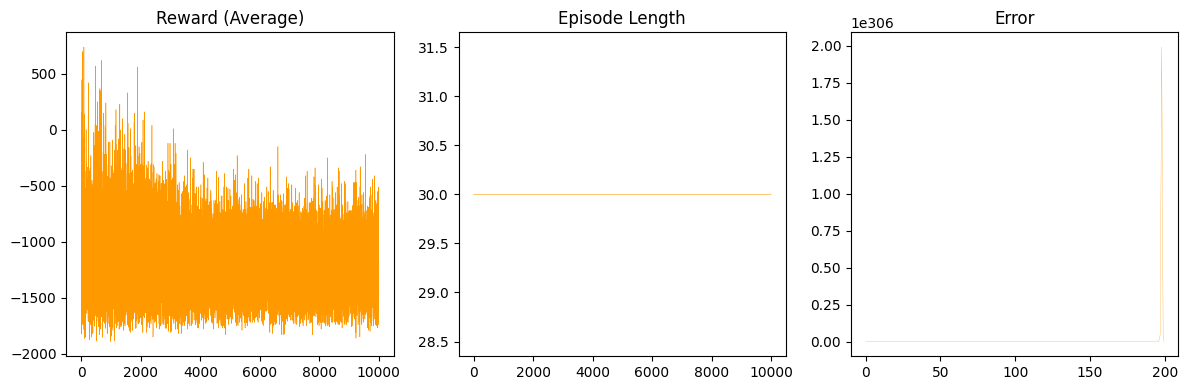

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4), ncols=3)
ax[0].plot(range(len(nenv.return_queue)), nenv.return_queue, c='#FF9900', linewidth=.4)
ax[0].set_title('Reward (Average)')
ax[1].plot(range(len(nenv.length_queue)), nenv.length_queue, c='#FF9900', linewidth=.4)
ax[1].set_title('Episode Length')
ax[2].plot(range(len(vfa_agent.training_error)), vfa_agent.training_error, c='#FF9900', linewidth=.2)
ax[2].set_title('Error')
plt.tight_layout()
plt.show()

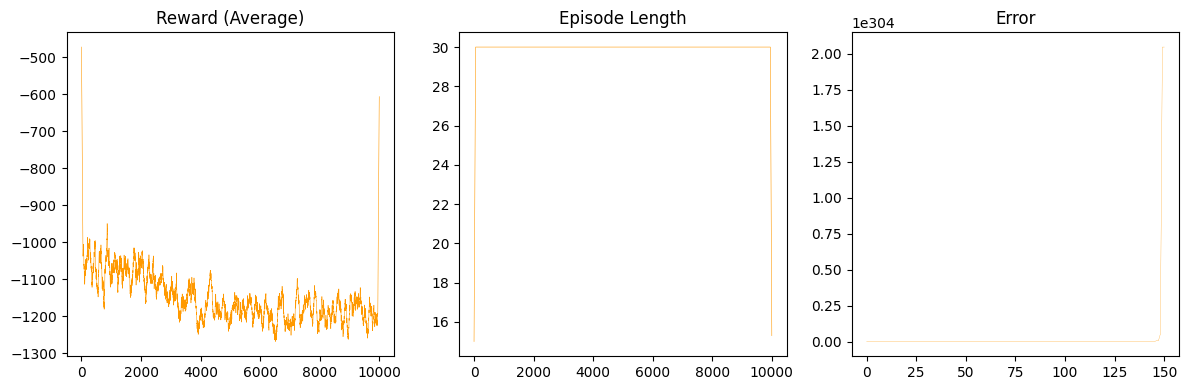

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4), ncols=3)
sns.lineplot(x=range(len(rewards)), y=rewards, ax=ax[0], c='#FF9900', linewidth=.4)
ax[0].set_title('Reward (Average)')
sns.lineplot(x=range(len(lengths)), y=lengths, ax=ax[1], c='#FF9900', linewidth=.4)
ax[1].set_title('Episode Length')
sns.lineplot(x=range(len(error)), y=error, ax=ax[2], c='#FF9900', linewidth=.2)
ax[2].set_title('Error')
plt.tight_layout()
plt.show()

In [ ]:
vfa_agent.w

tensor([[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]], dtype=torch.float64, requires_grad=True)